In [1]:
import glob
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams.update({'font.size': 20})

# Experimental Results

## Discriminator CNNs

In [25]:
disc_exp_data = []

for fp in glob.glob("./experiments/discriminators/*.json"):
    with open(fp) as f:
        disc_exp_data.append(json.load(f))

disc_exp_data = sorted(
    disc_exp_data,
    key=lambda k: k["model"],
)

In [26]:
data = {}
for exp in disc_exp_data:
    label = exp["model"]
    label_data = []
    
    for run in range(50):
        for epoch in range(10):
            label_data.append({
                "run": run + 1,
                "epoch": epoch + 1,
                "accuracy": exp["acc_histories"][run][epoch]
            })
    
    data[label] = pd.DataFrame(label_data)

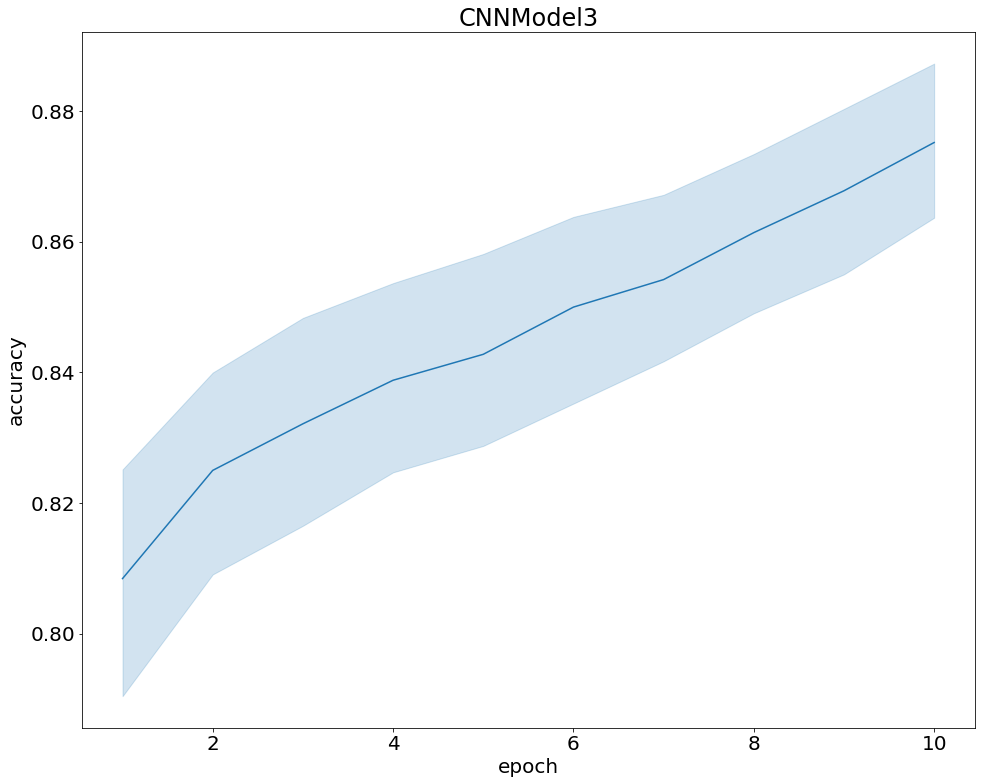

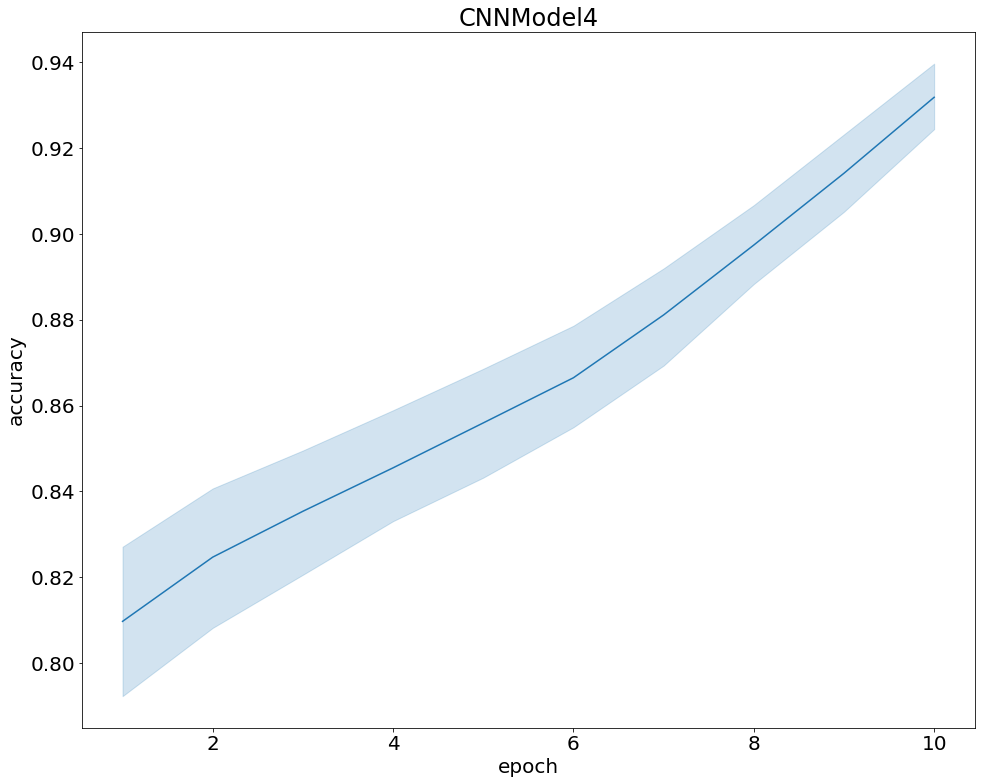

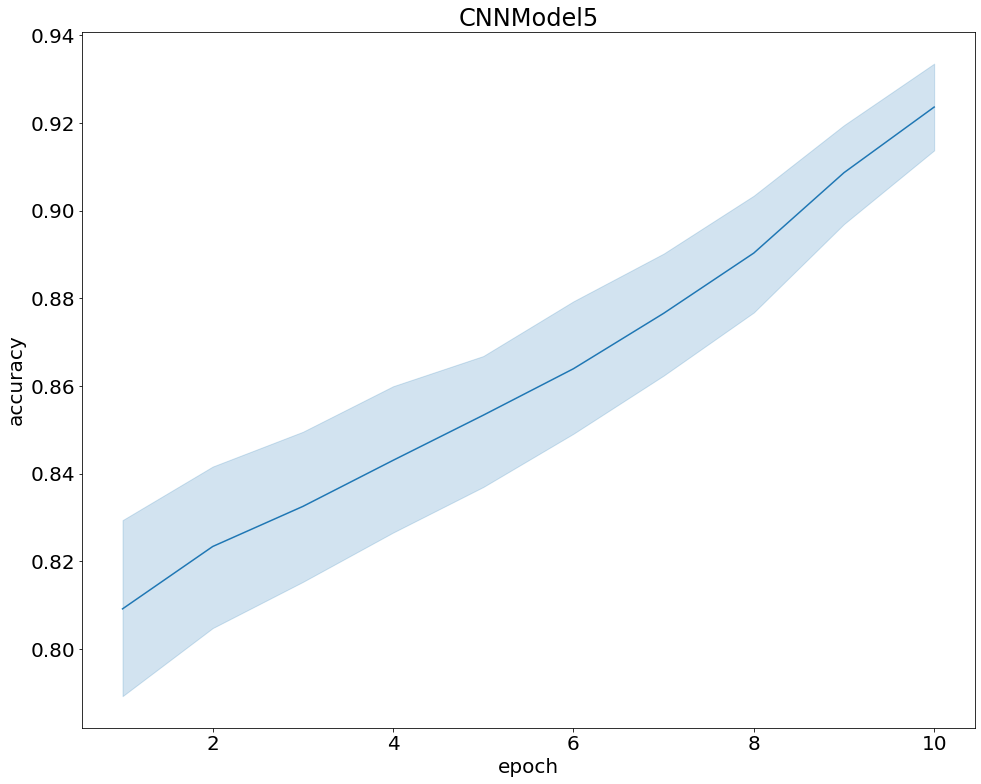

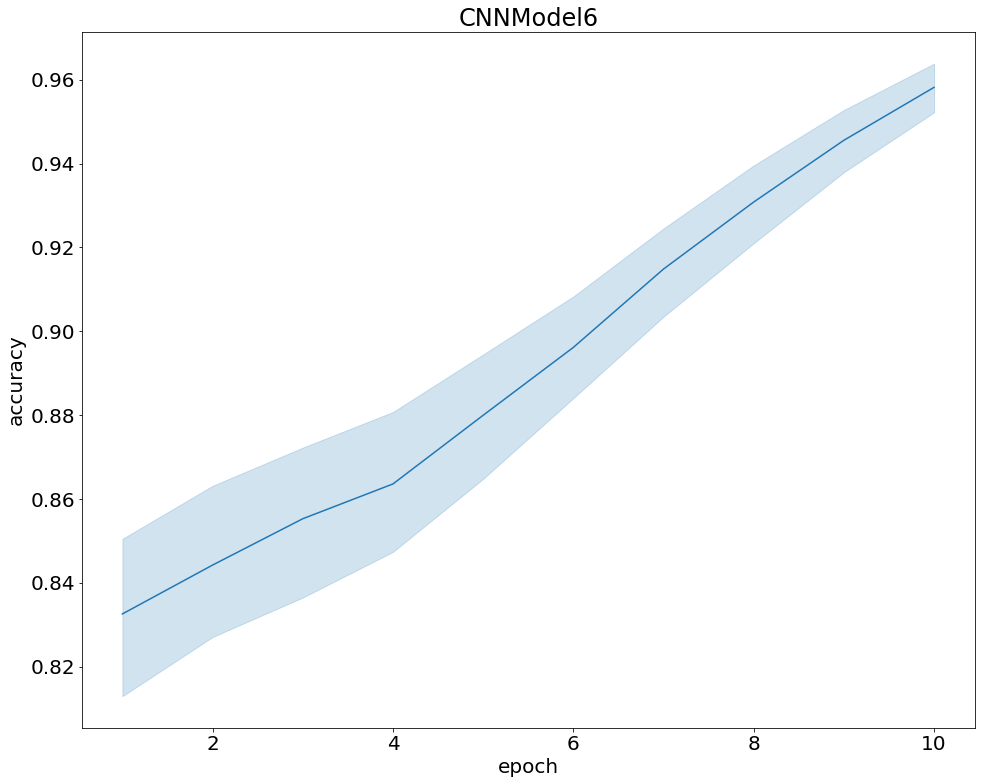

In [27]:
for k, v in data.items():
    title = f"{k}"
    
    plt.figure(figsize=(16, 12.8))
    # Plot mean with 95% confidence level
    ax = sns.lineplot(x="epoch", y="accuracy", data=v)
    ax.set(title=title, ylabel="accuracy")

## States and Symbols

In [6]:
exp_data = []

for fp in glob.glob("./experiments/states_symbols/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

In [7]:
# Sort the experiment data by states and then symbols
exp_data = sorted(
    exp_data,
    key=lambda k: (k["params"]["states"], k["params"]["symbols"])
)

### Boxplots - Best solution vs random solution error by parameters

In [8]:
# Convert experiment data to format to be displayed as boxplots
data = {}
for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    label_data = []
    
    for i in range(10):
        label_data.append({
            "best_l2": exp["best_l2s"][i] / params["states"],
            "rand_l2": exp["rand_l2s"][i] / params["states"],
        })
    
    data[label] = pd.DataFrame(label_data)

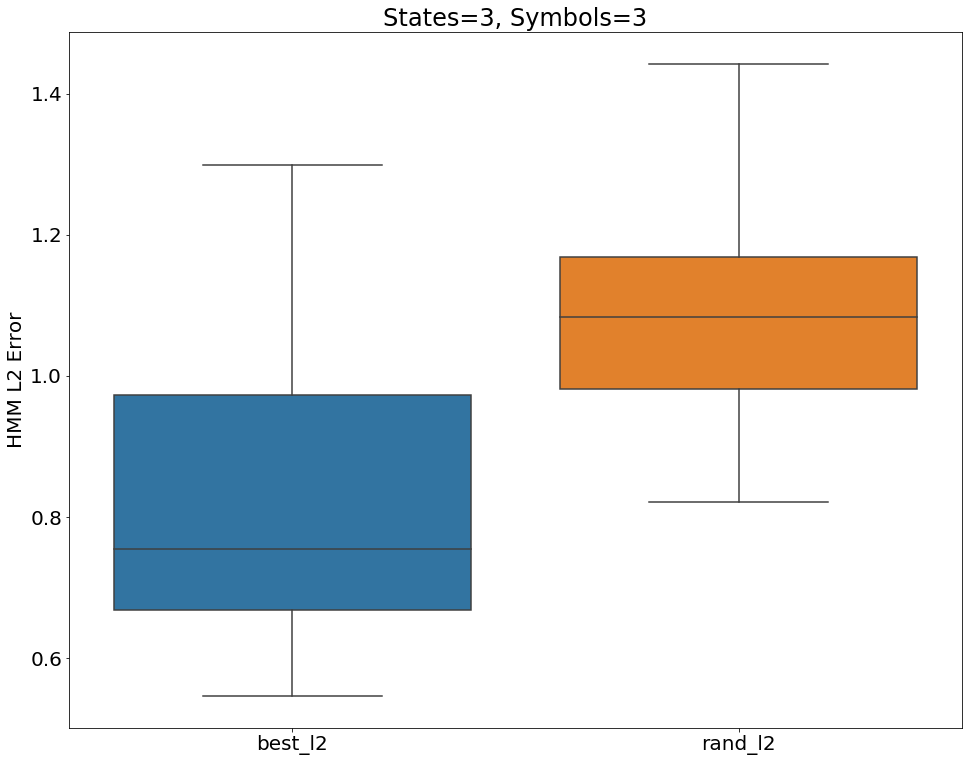

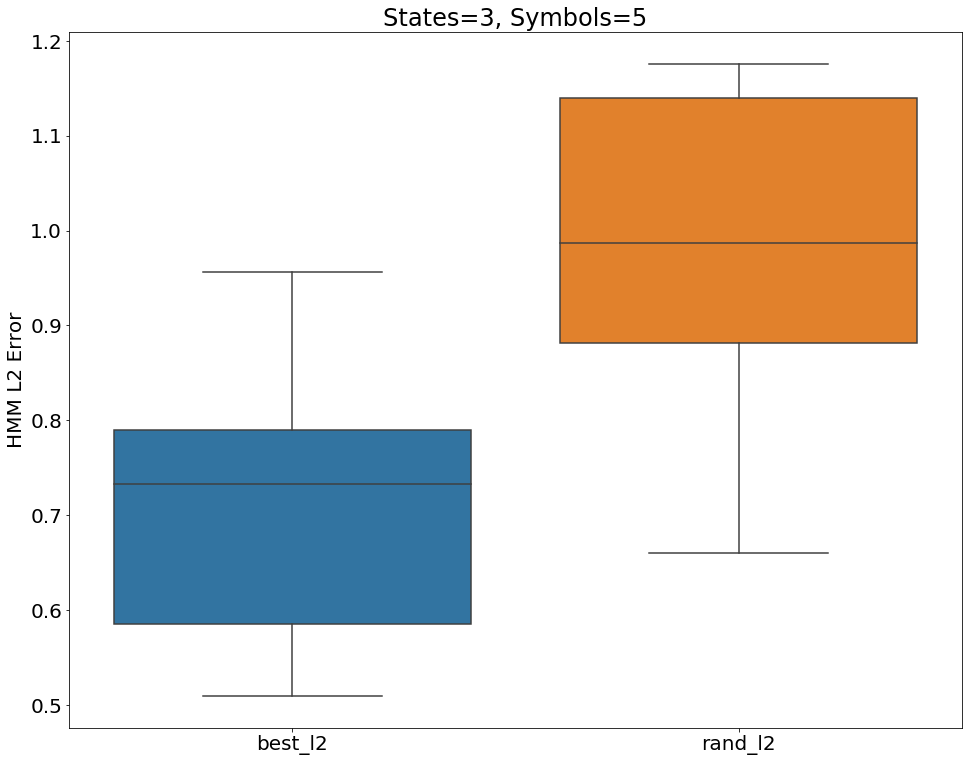

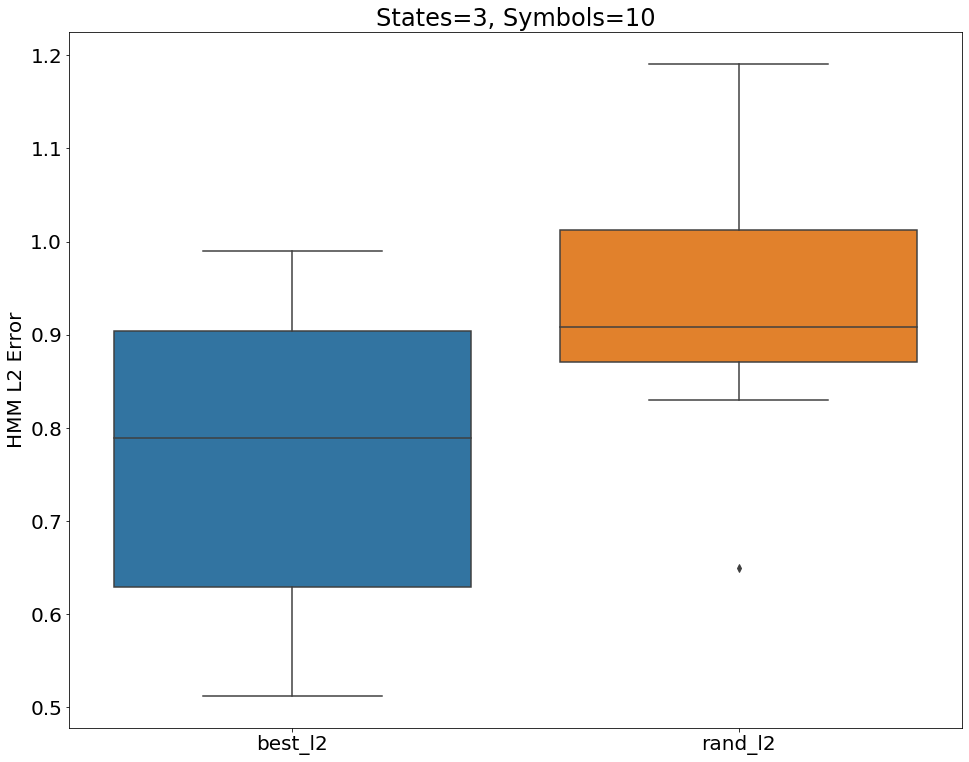

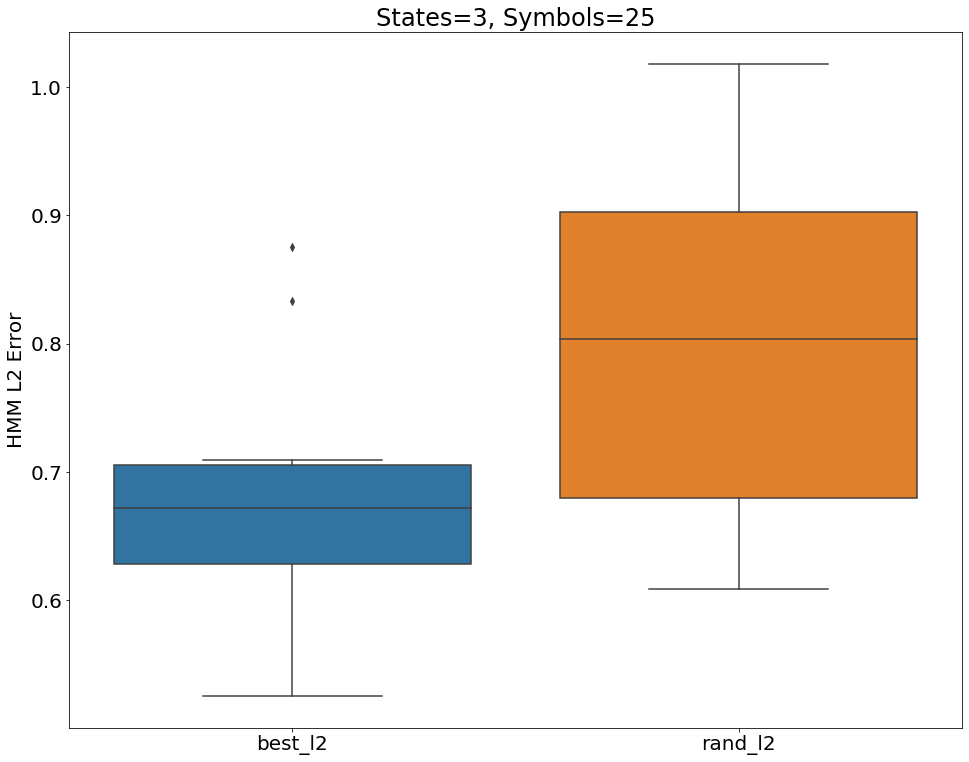

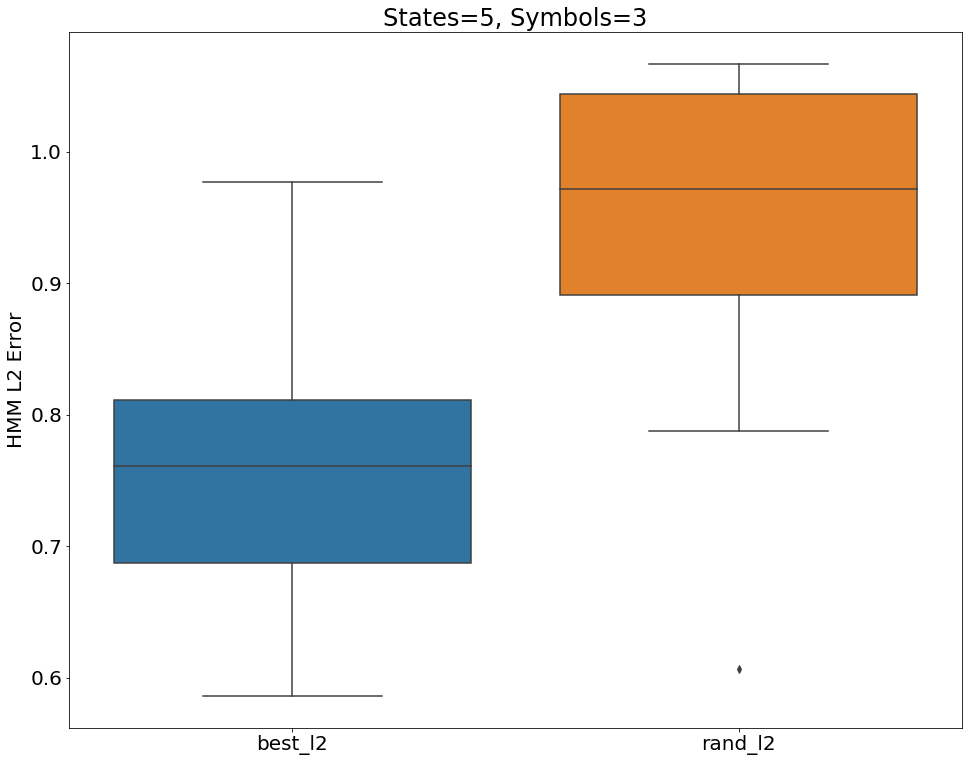

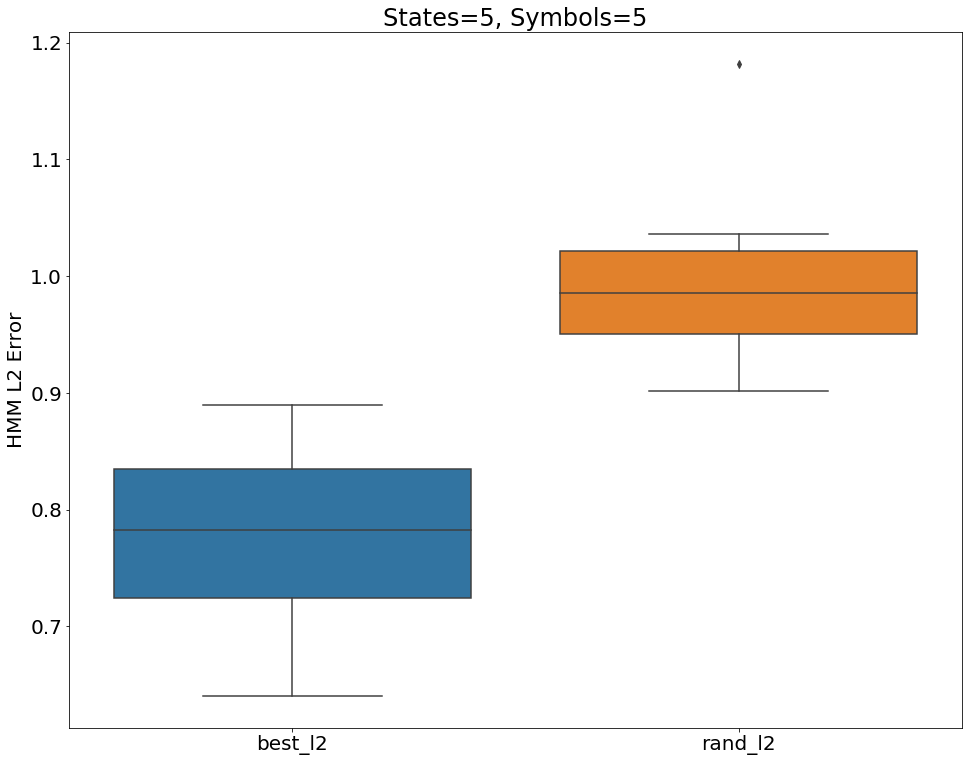

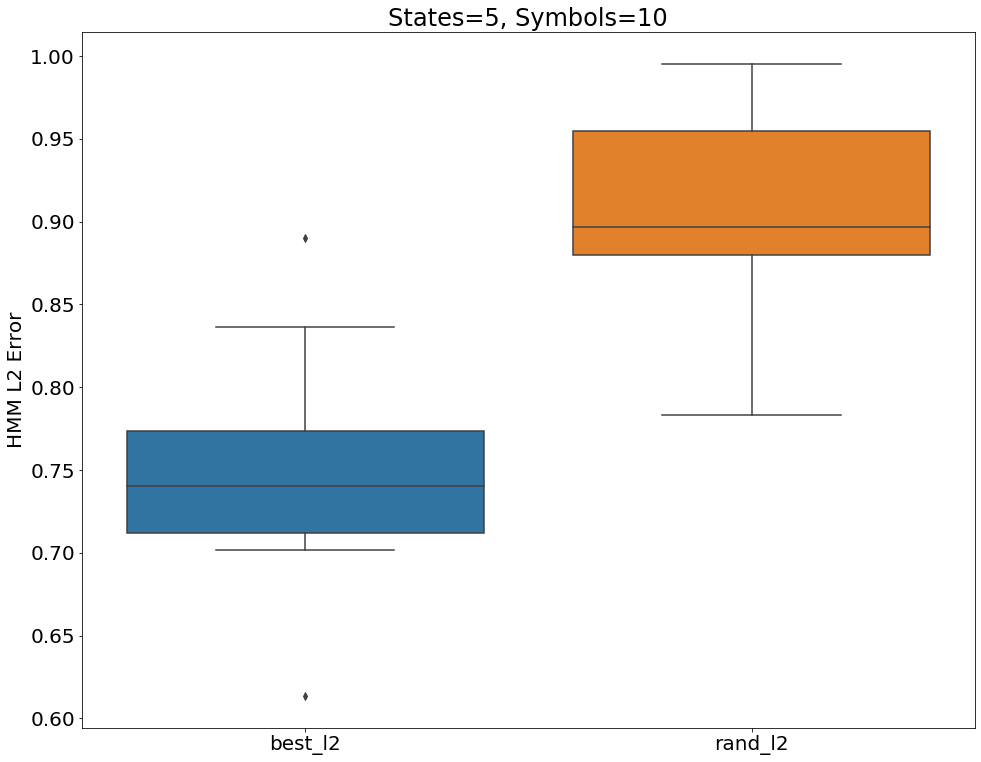

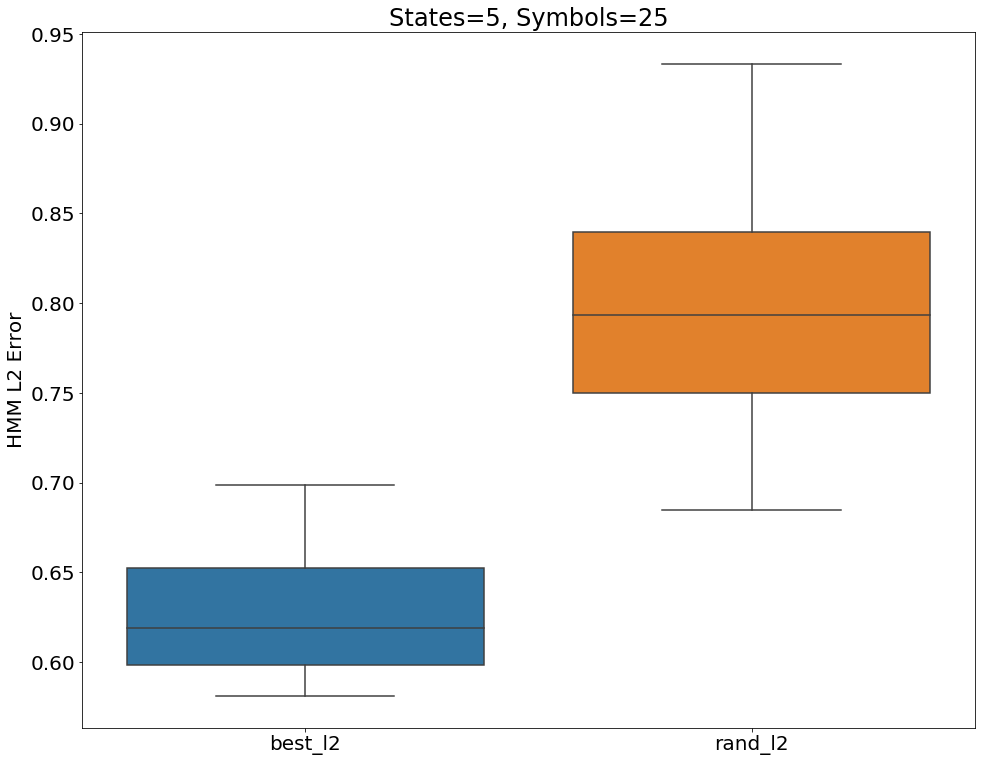

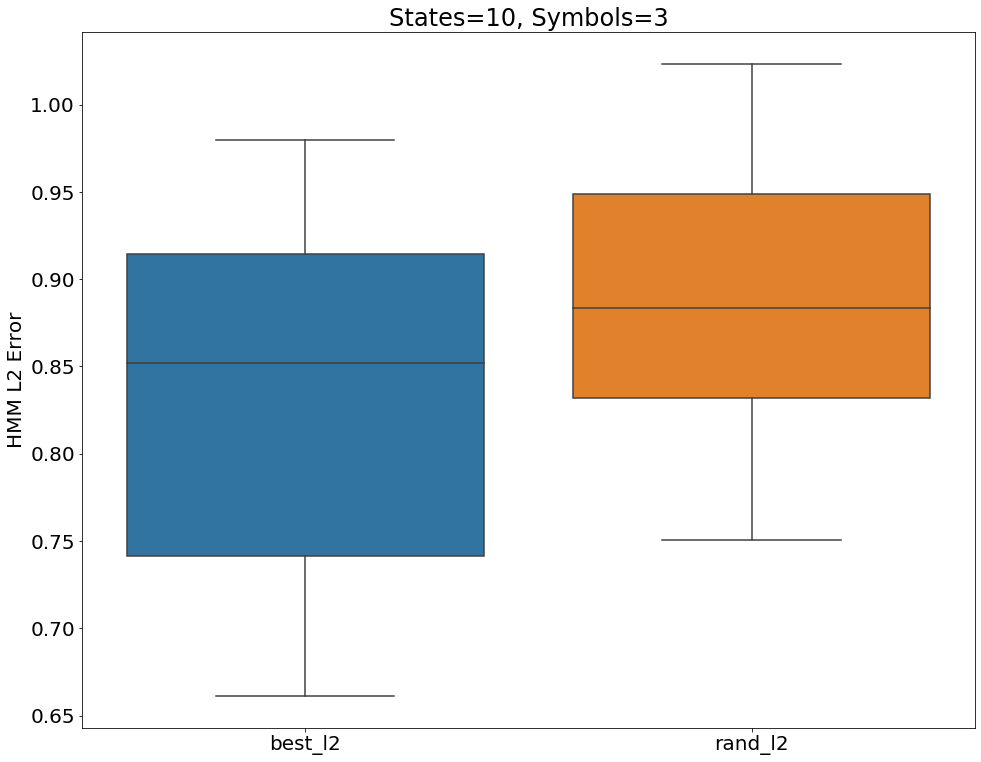

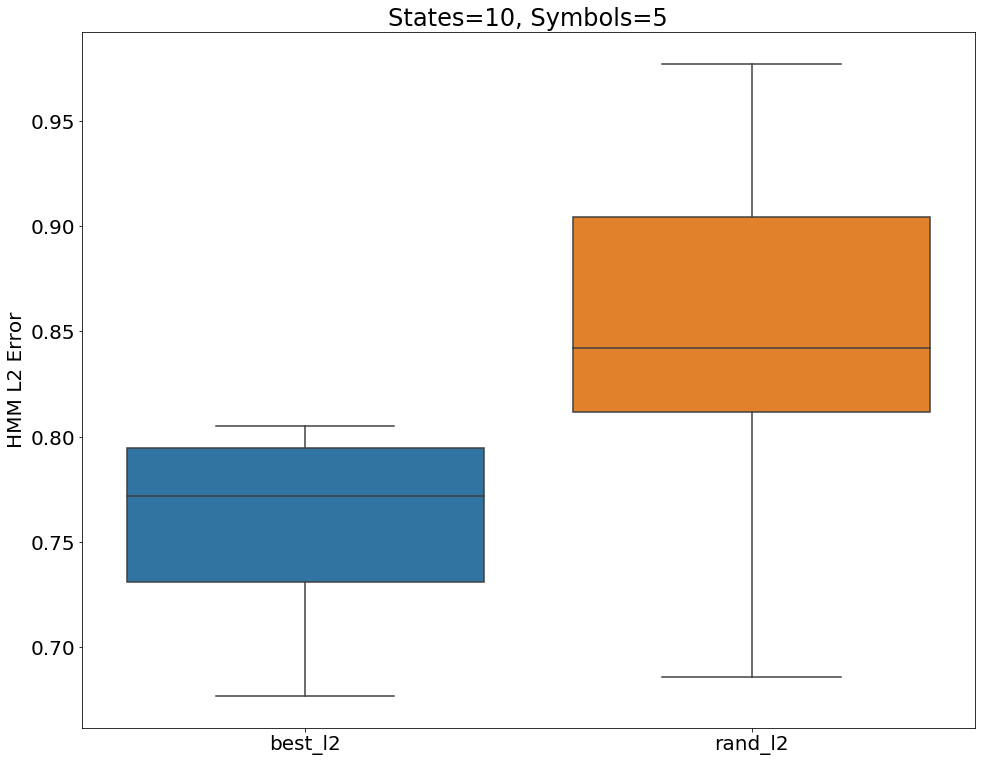

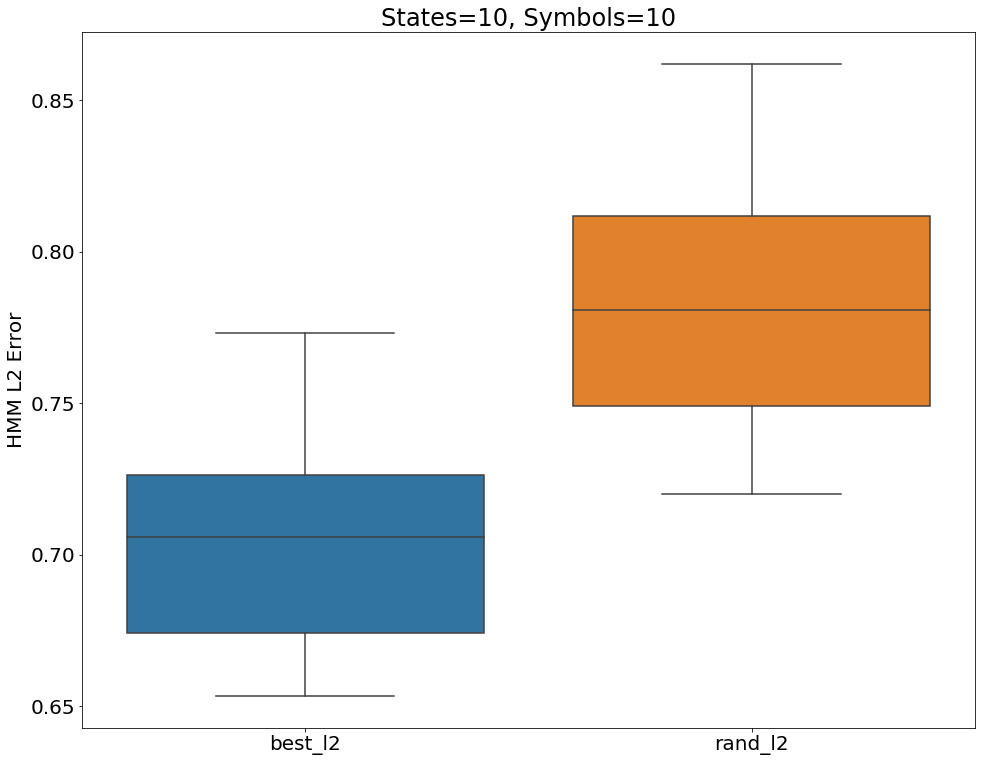

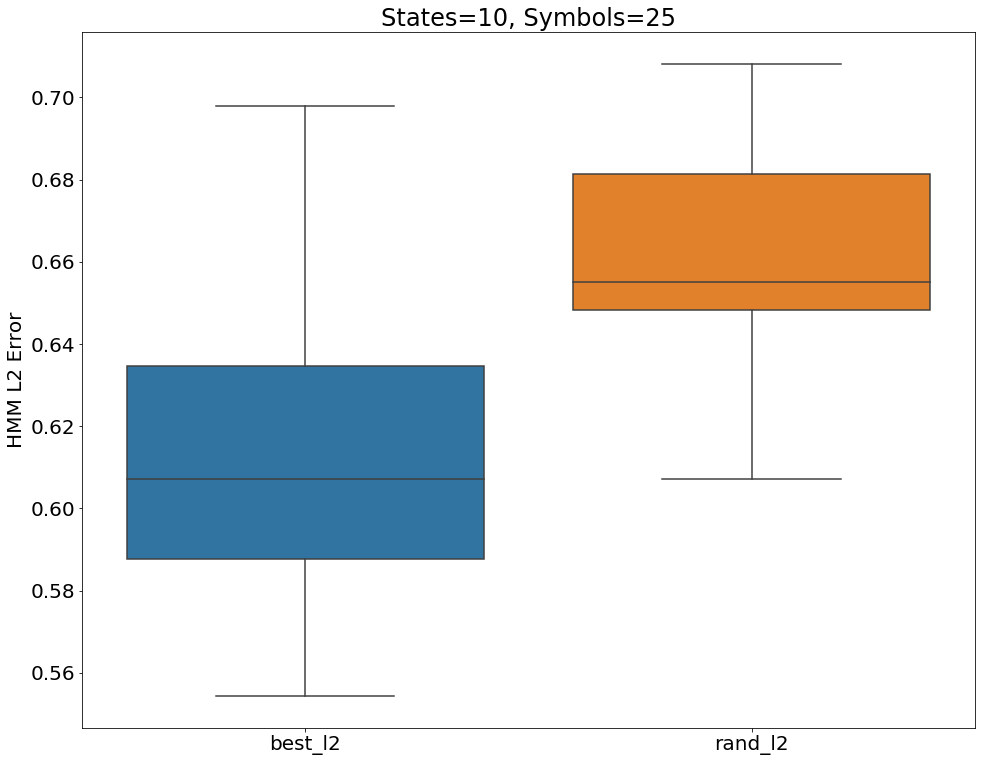

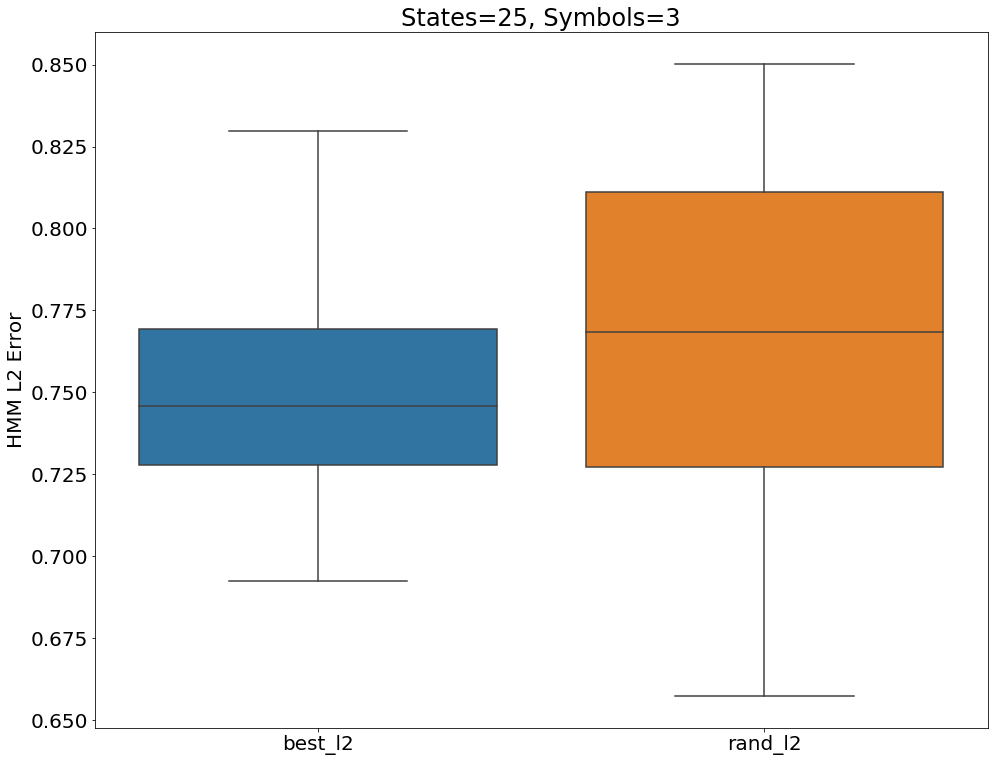

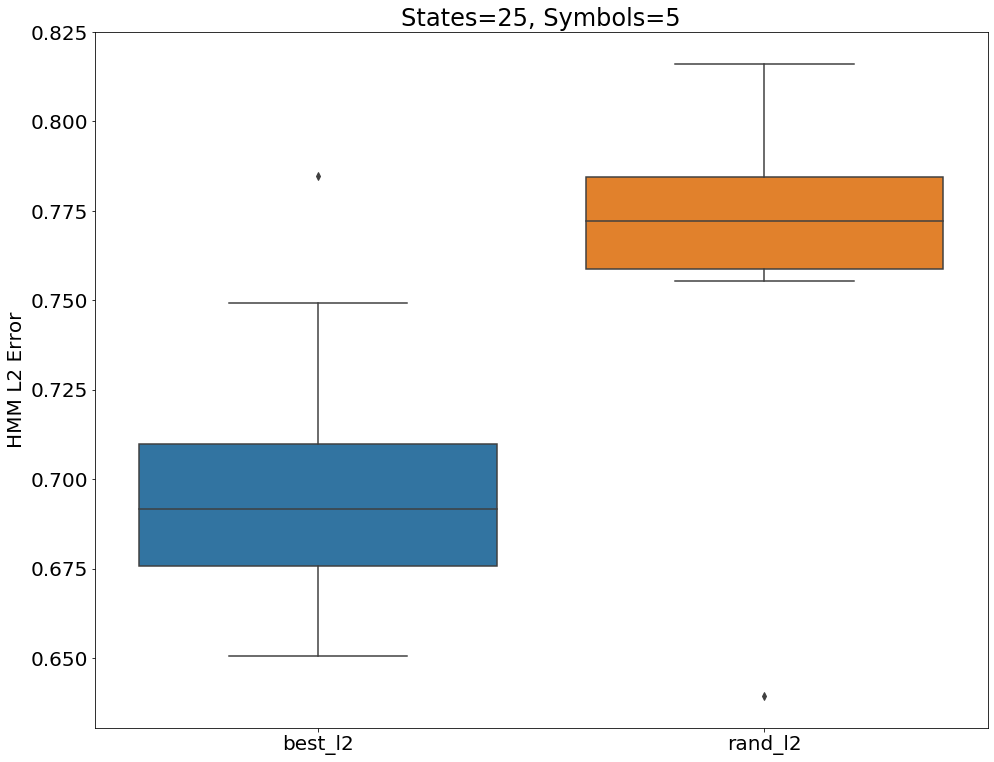

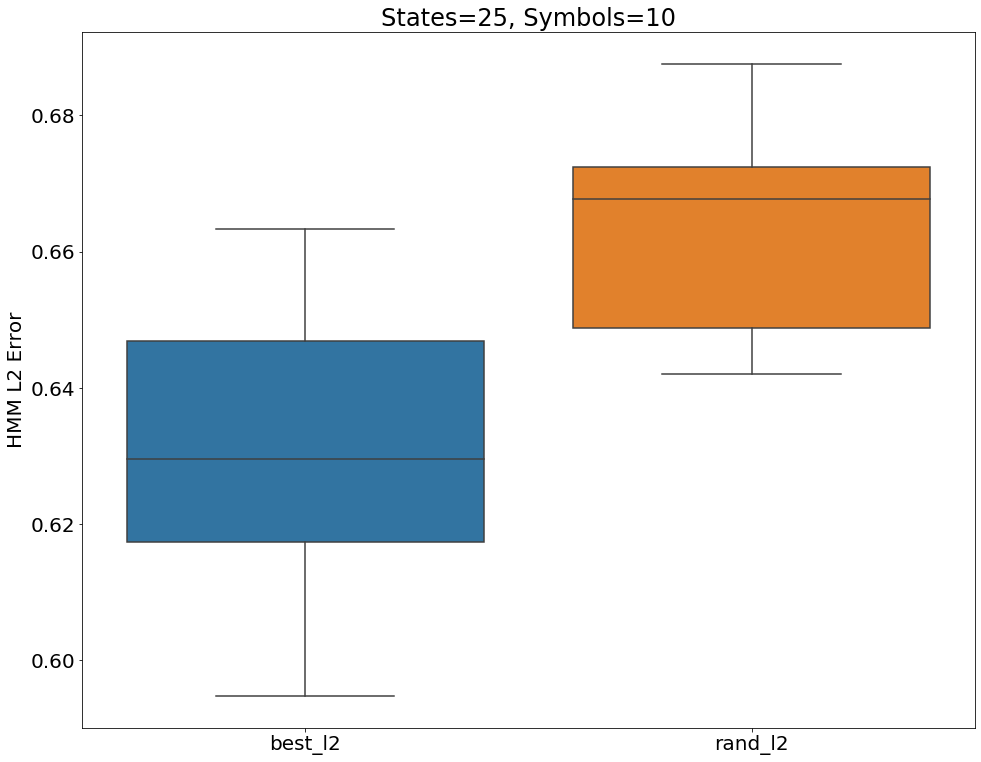

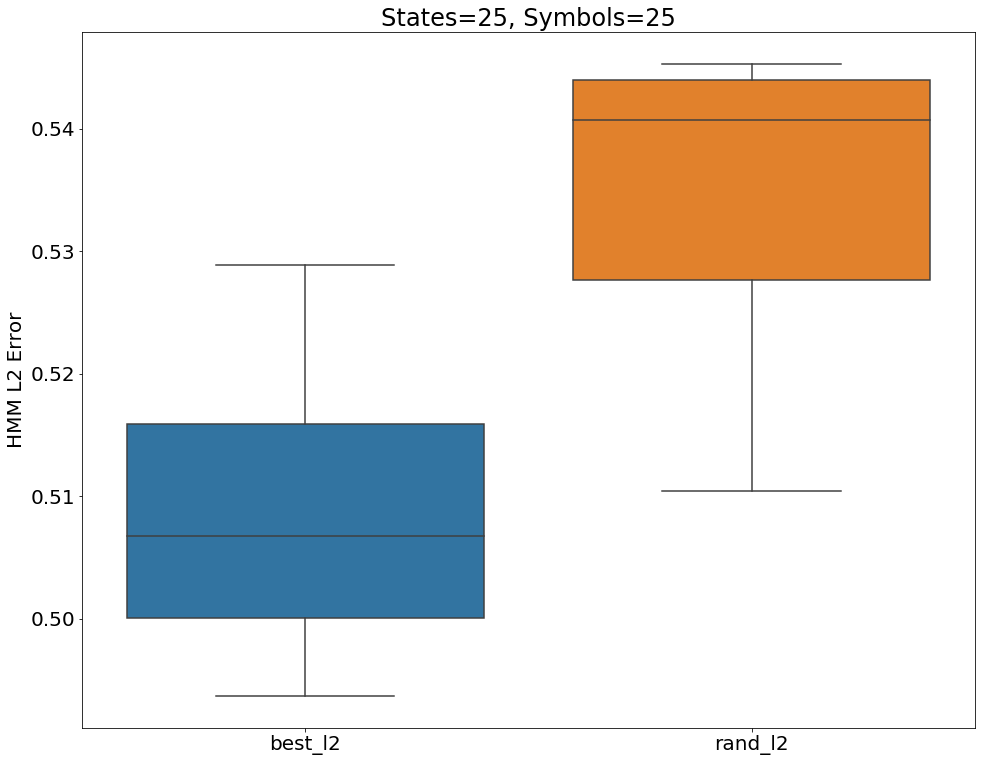

In [9]:
for k, v in data.items():
    title = f"States={k[0]}, Symbols={k[1]}"
    
    plt.figure(figsize=(16, 12.8))
    ax = sns.boxplot(data=v)
    ax.set(title=title, ylabel="HMM L2 Error")

### Lineplots - Best vs random solution run-by-run error split by parameters

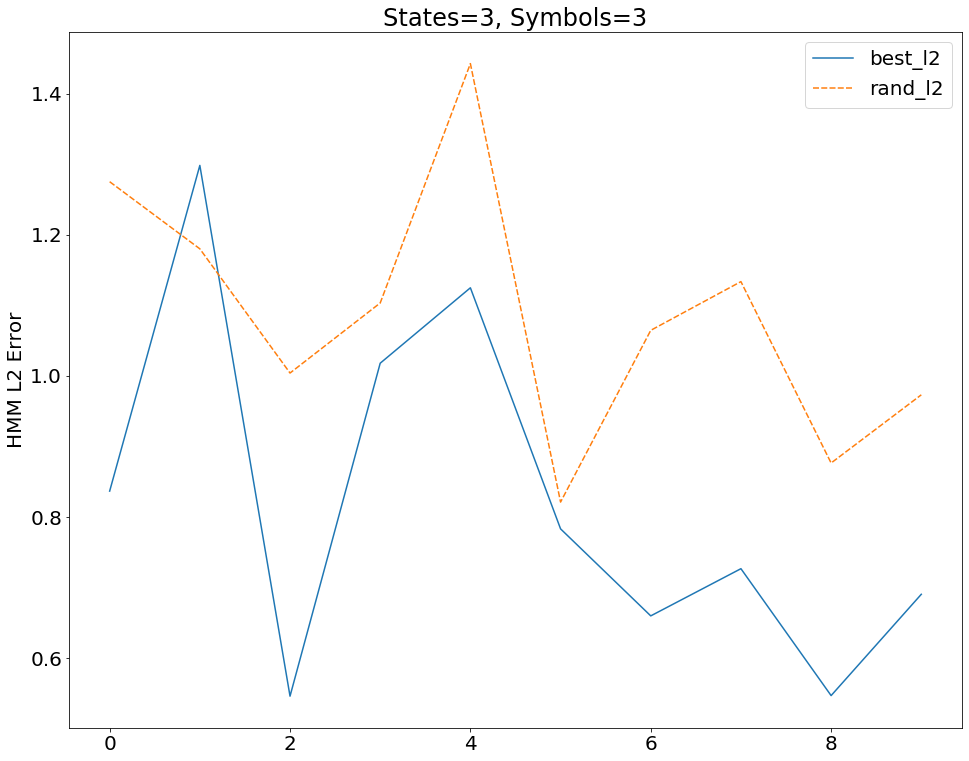

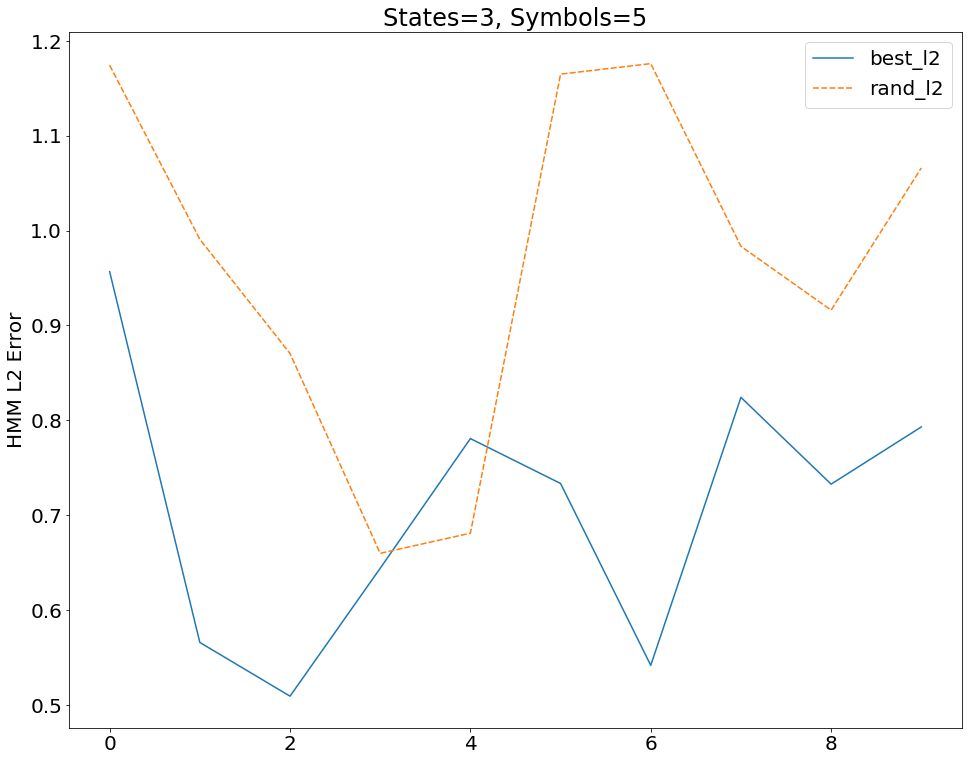

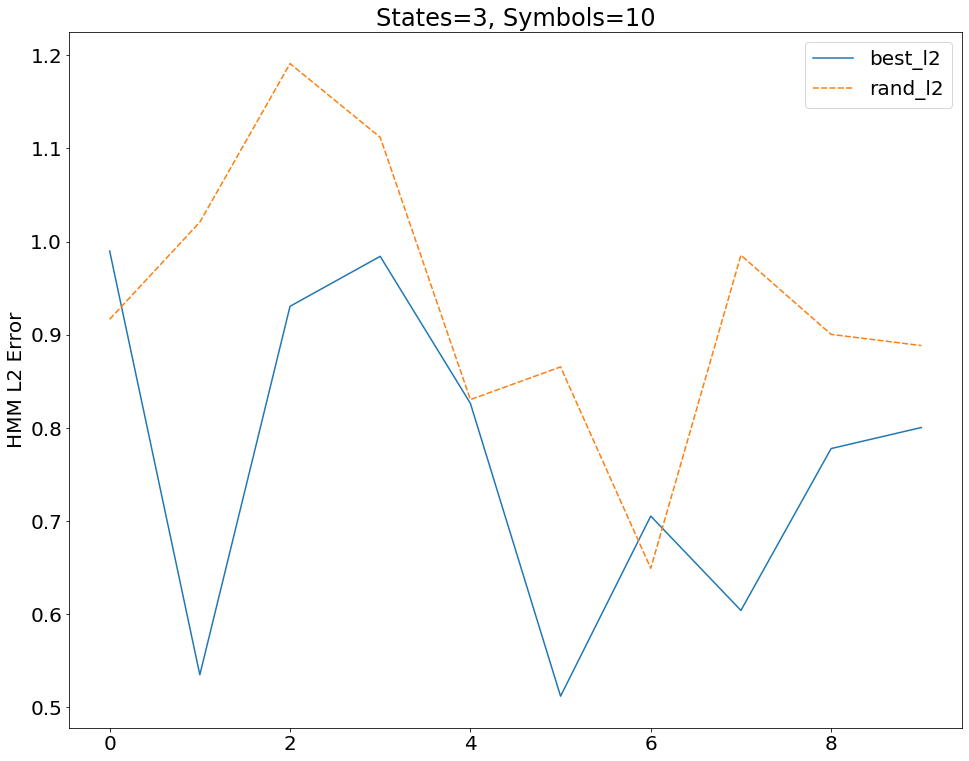

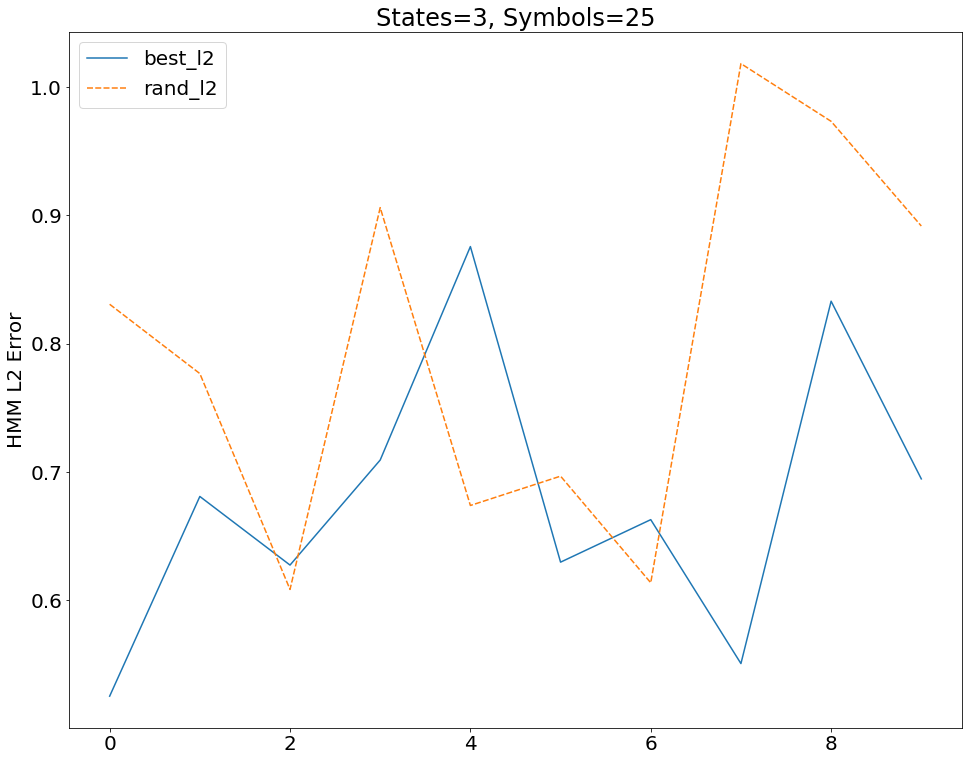

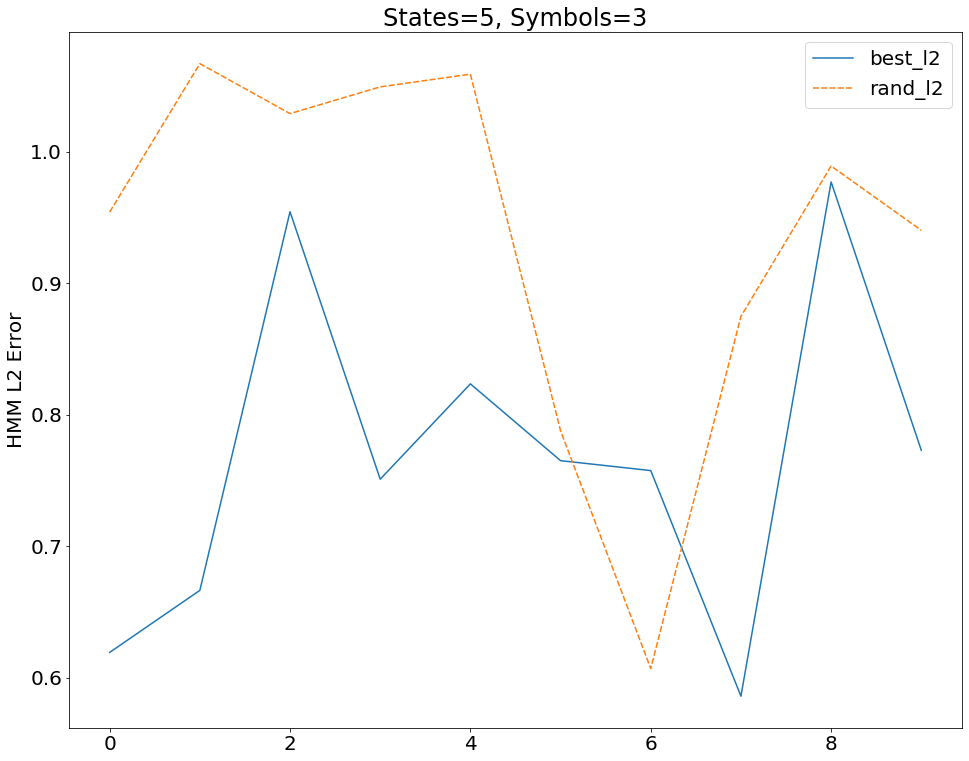

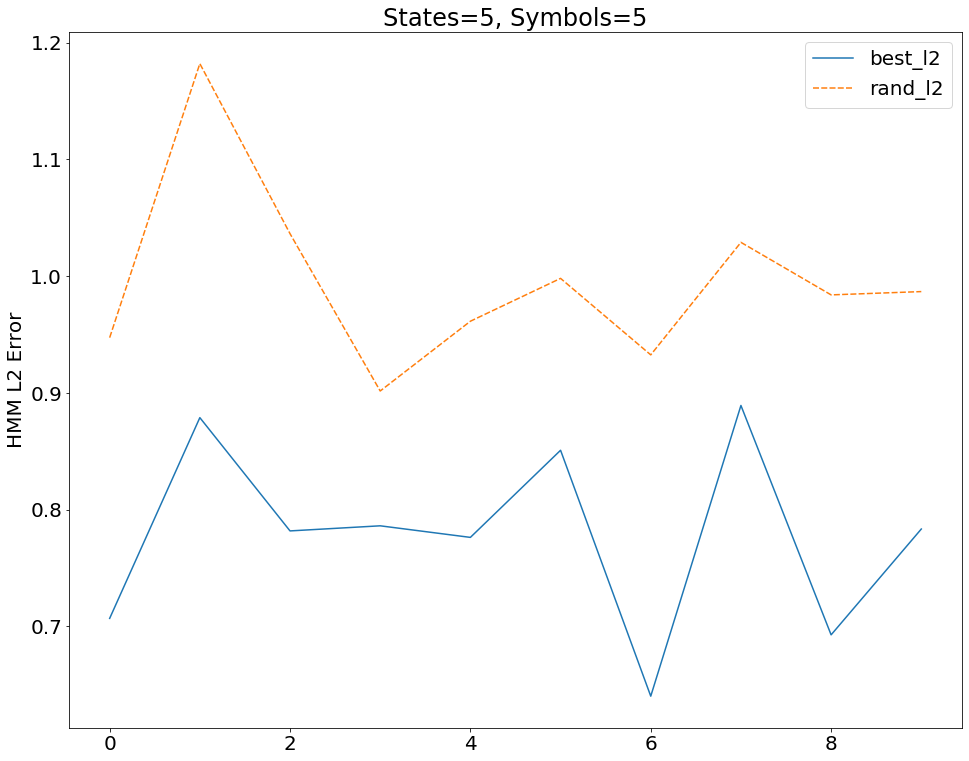

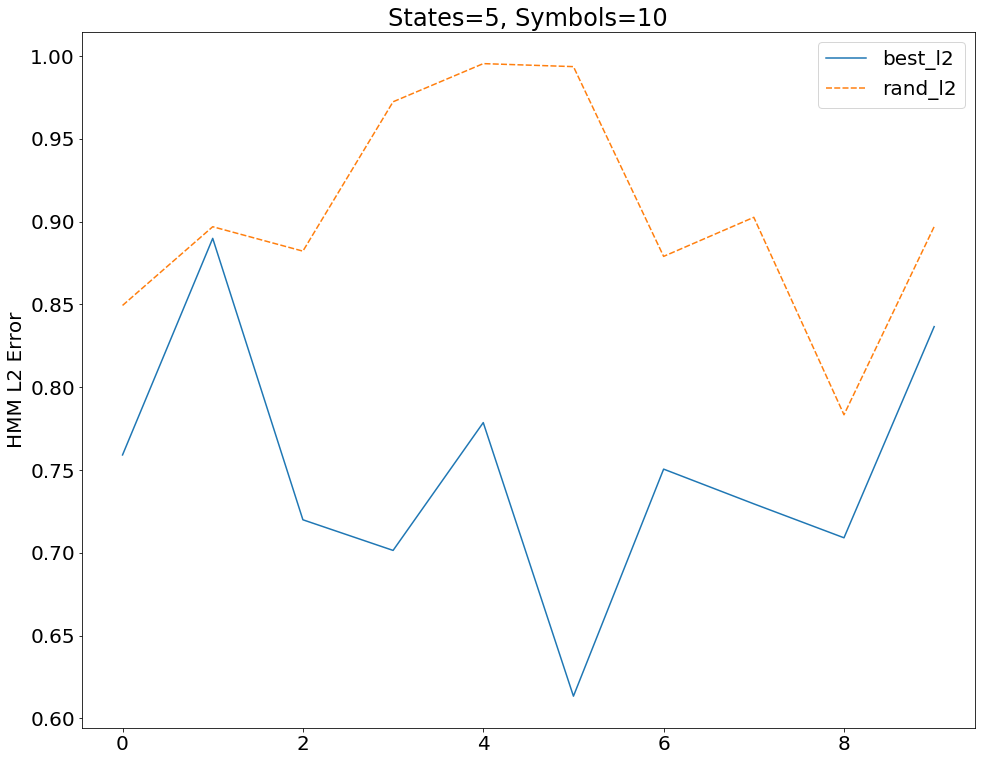

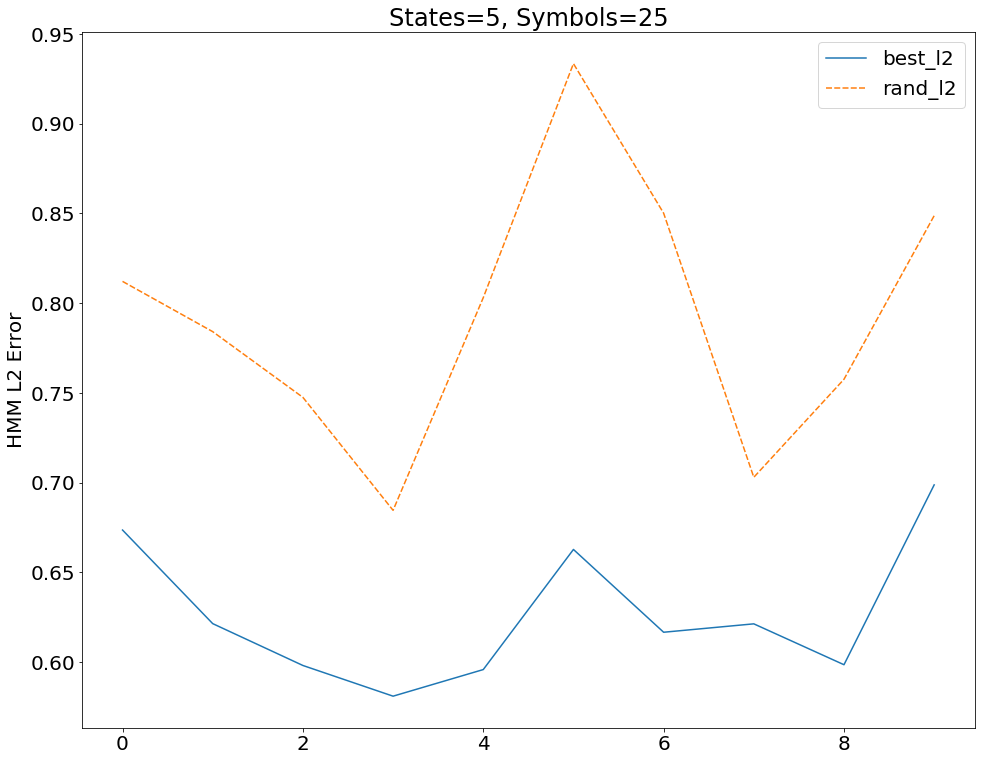

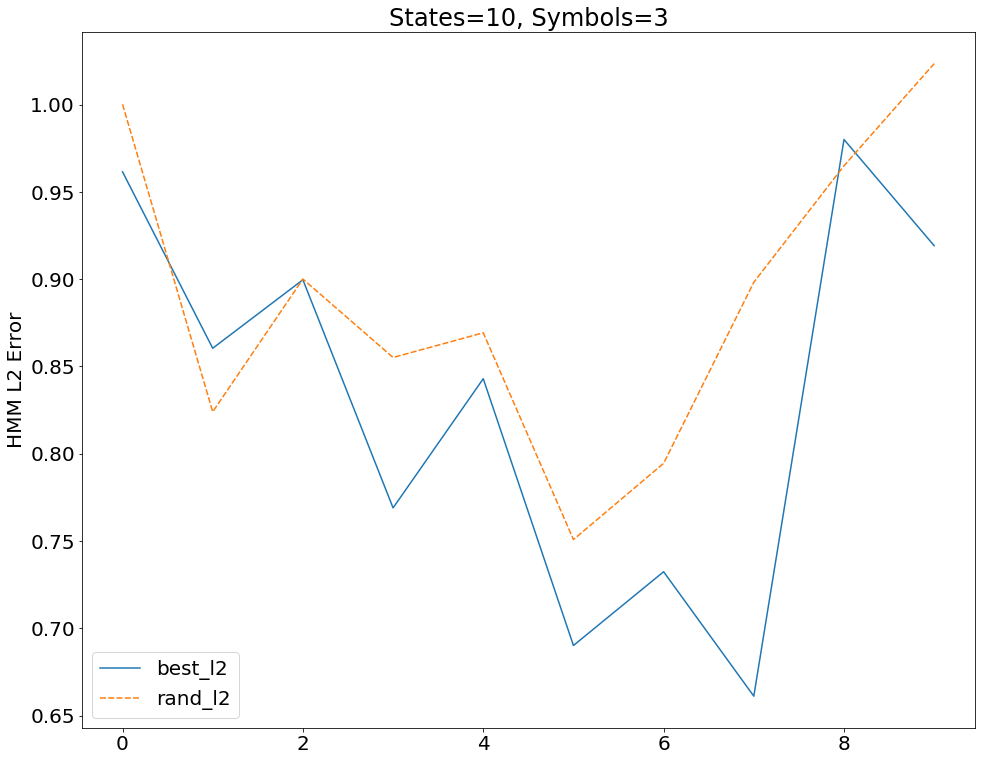

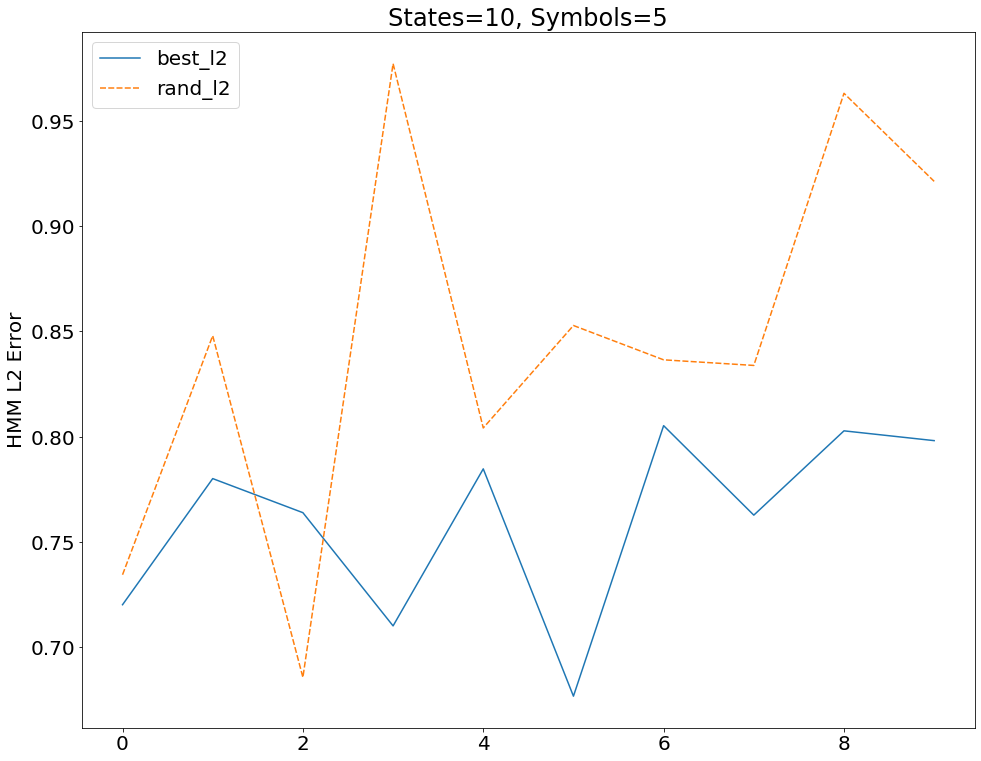

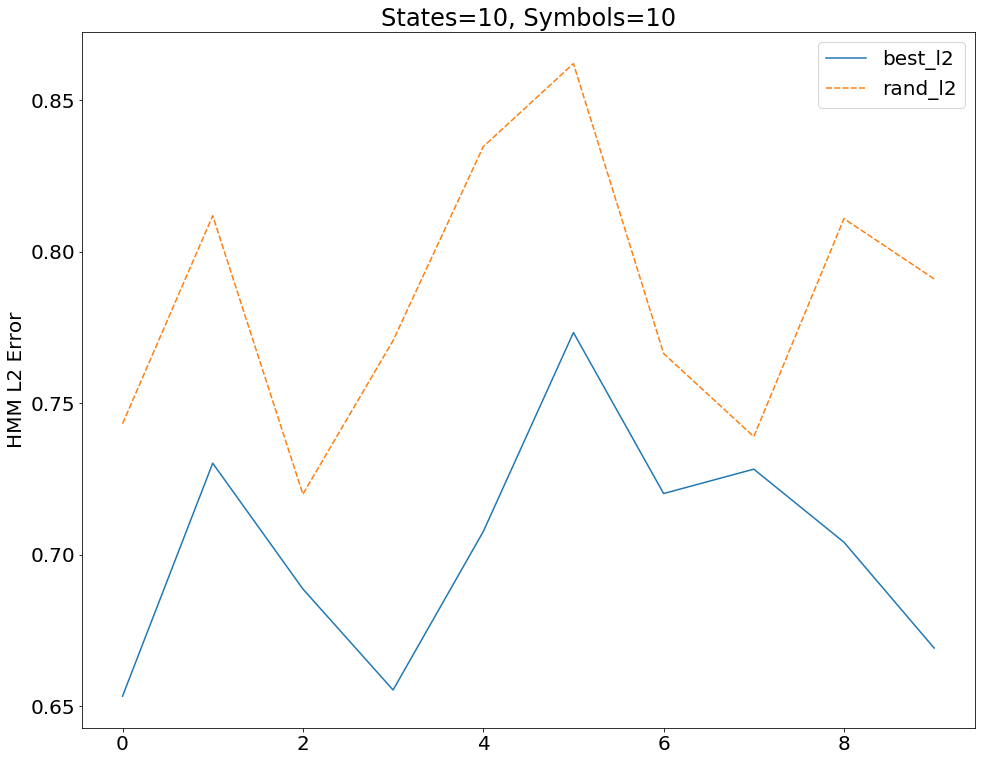

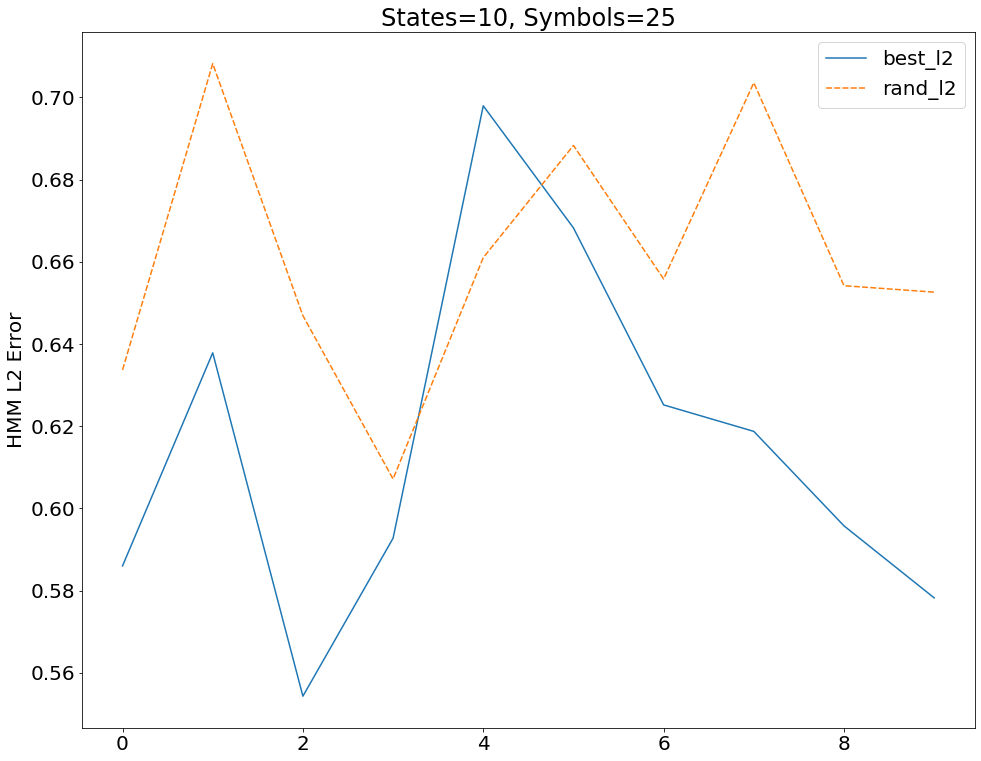

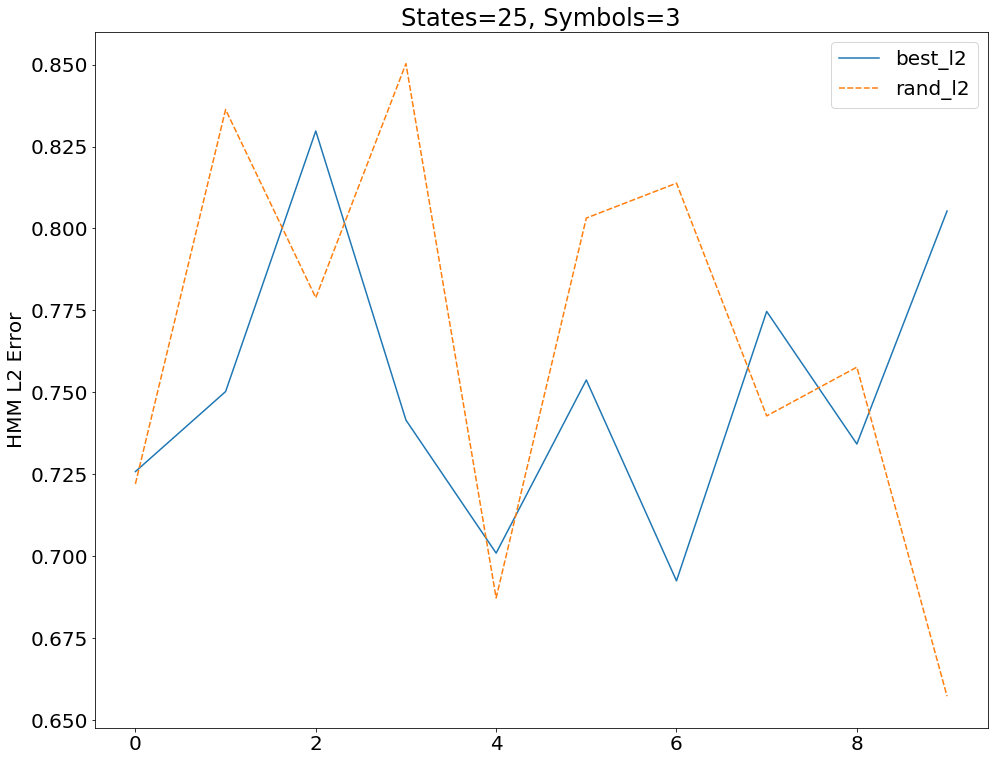

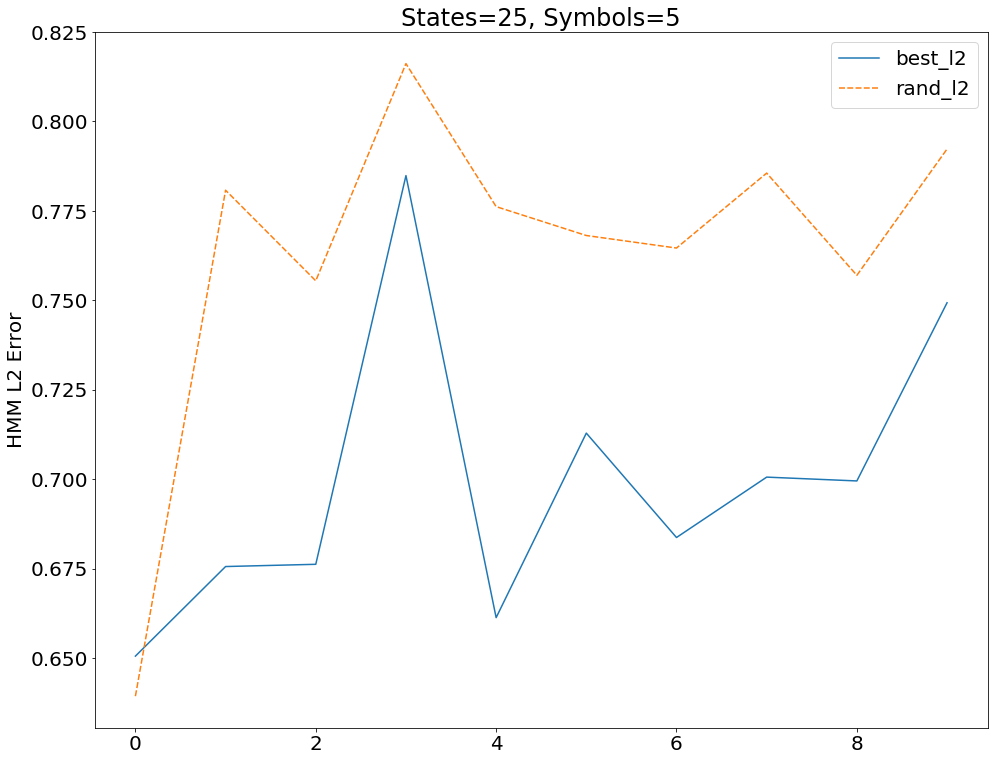

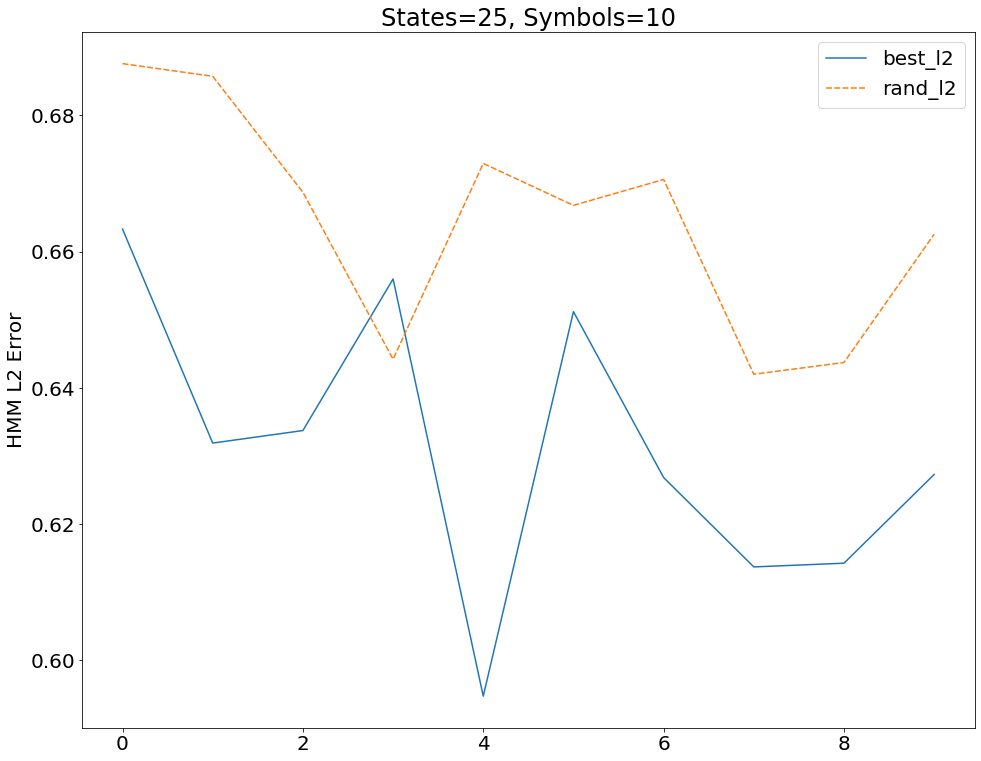

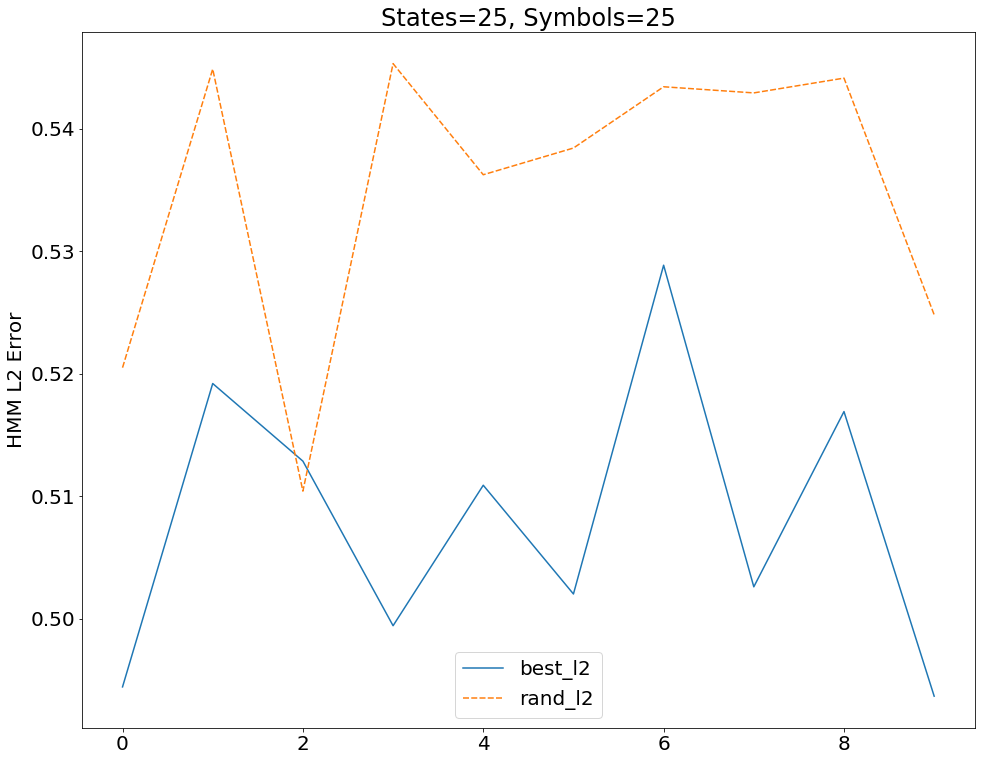

In [10]:
for k, v in data.items():
    title = f"States={k[0]}, Symbols={k[1]}"
    
    plt.figure(figsize=(16, 12.8))
    ax = sns.lineplot(data=v)
    ax.set(title=title, ylabel="HMM L2 Error")

### Boxplot - Error distribution for each parameter setting

In [11]:
# Convert experiment data to format to be displayed as boxplots
data = []
for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    
    for i in range(10):
        data.append({
            "label": label,
            "model": "best_l2",
            "loss": exp["best_l2s"][i] / params["states"],
        })
        data.append({
            "label": label,
            "model": "rand_l2",
            "loss": exp["rand_l2s"][i] / params["states"],
        })

df = pd.DataFrame(data)

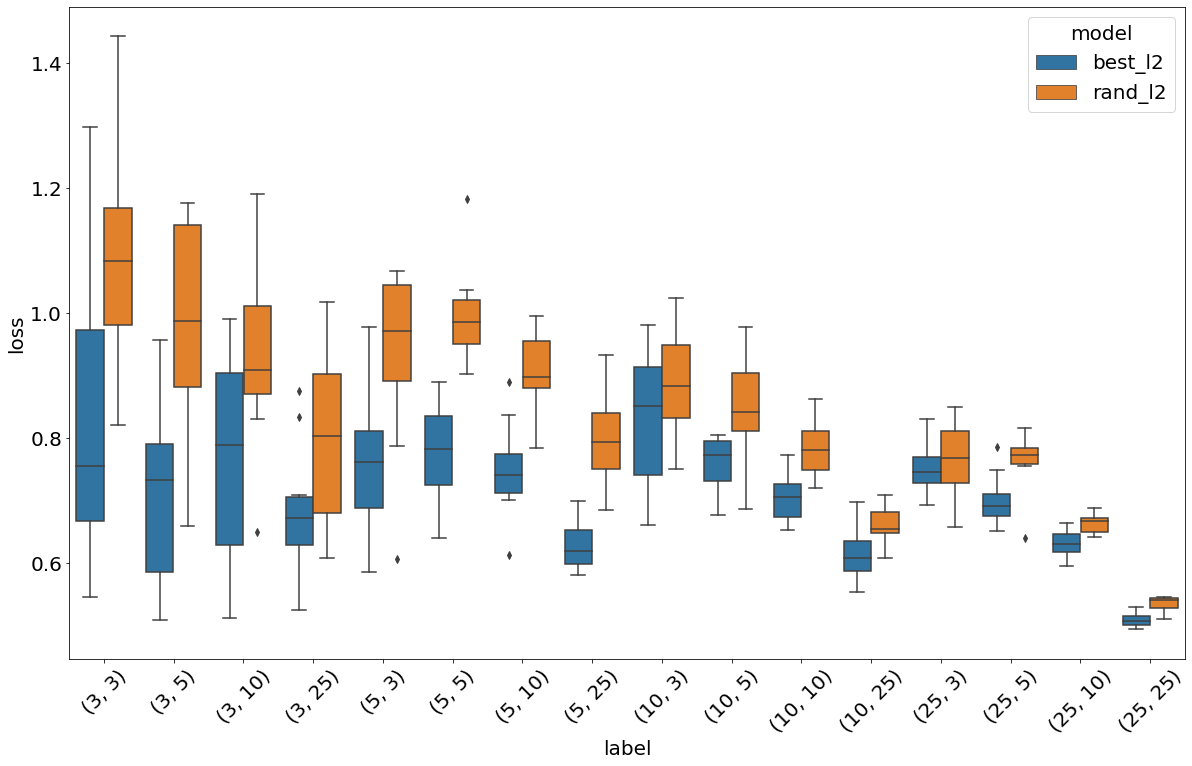

In [12]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="label",
    y="loss",
    hue="model",
    data=df
)

### Lineplot - Mean error over all runs for each parameter setting

In [13]:
mean_losses = []

for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    
    mean_losses.append({
        "label": label,
        "model": "best_l2",
        "mean_loss": np.mean(exp["best_l2s"]) / params["states"],
    })
    
    mean_losses.append({
        "label": label,
        "model": "rand_l2",
        "mean_loss": np.mean(exp["rand_l2s"]) / params["states"],
    })
    
df = pd.DataFrame(mean_losses)

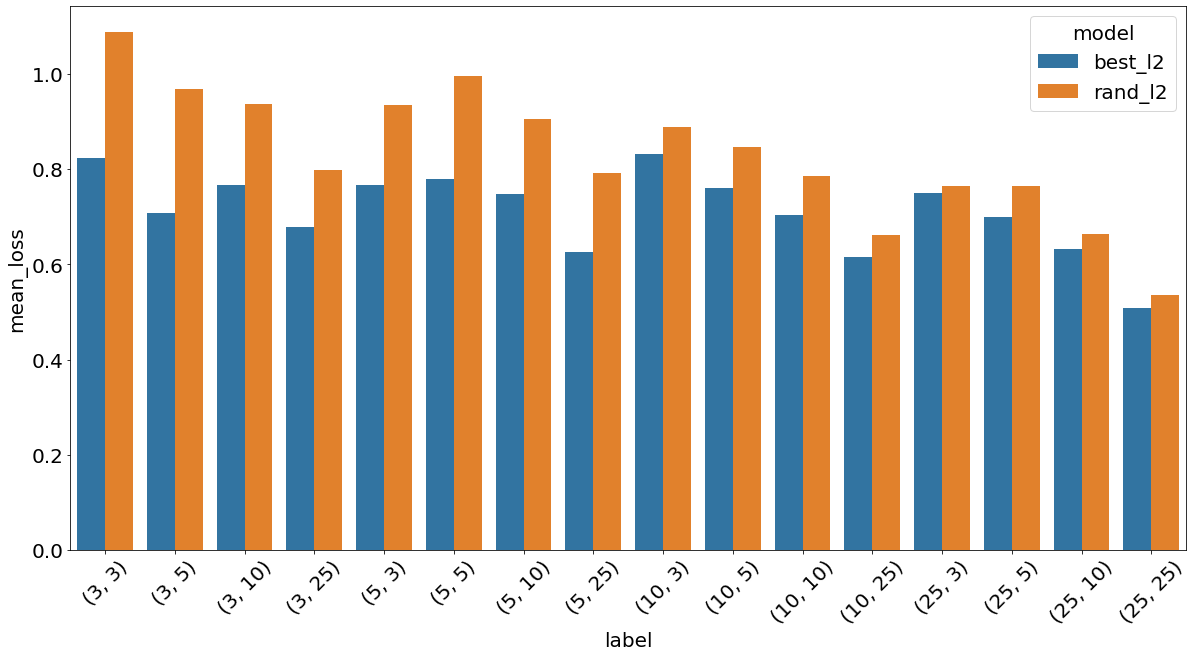

In [14]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45)

sns.barplot(
    x="label",
    y="mean_loss",
    hue="model",
    data=df,
)

### Lineplots - Fitness distribution over all runs by generation for each parameter setting

In [15]:
data = {}
for exp in exp_data:
    params = exp["params"]
    label = (params["states"], params["symbols"])
    label_data = []
    
    for r in range(10):
        for g in range(30):
            label_data.append({
                "run": r + 1,
                "gen": g + 1,
                "fitness": exp["mean_fitnesses"][r][g]
            })
    
    data[label] = pd.DataFrame(label_data)

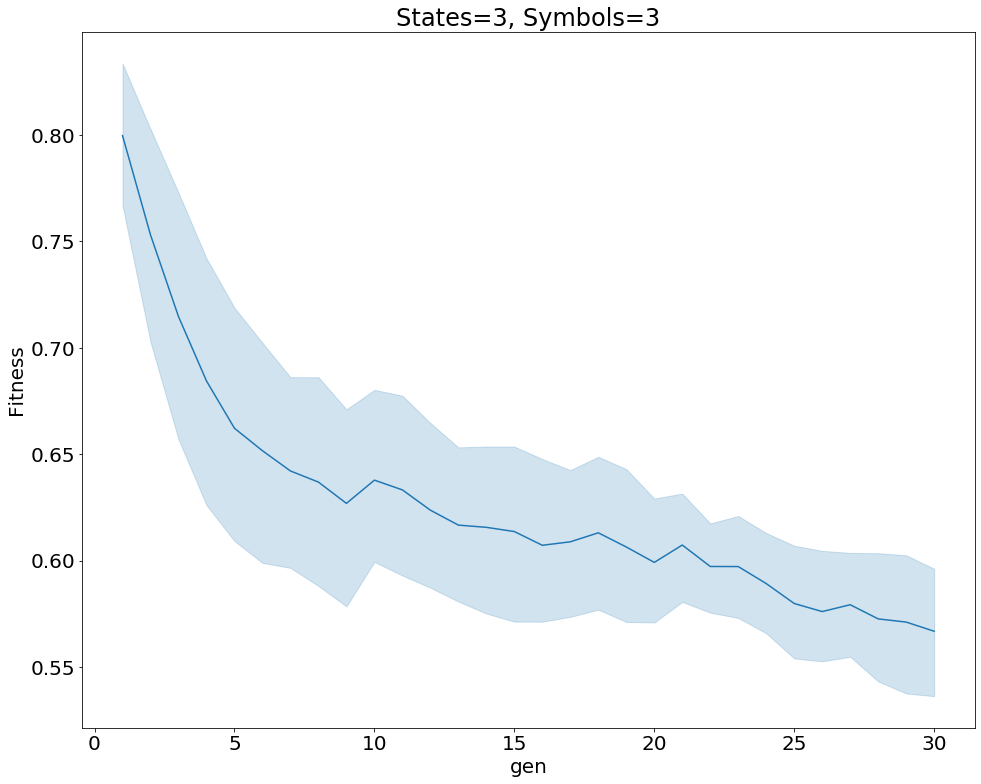

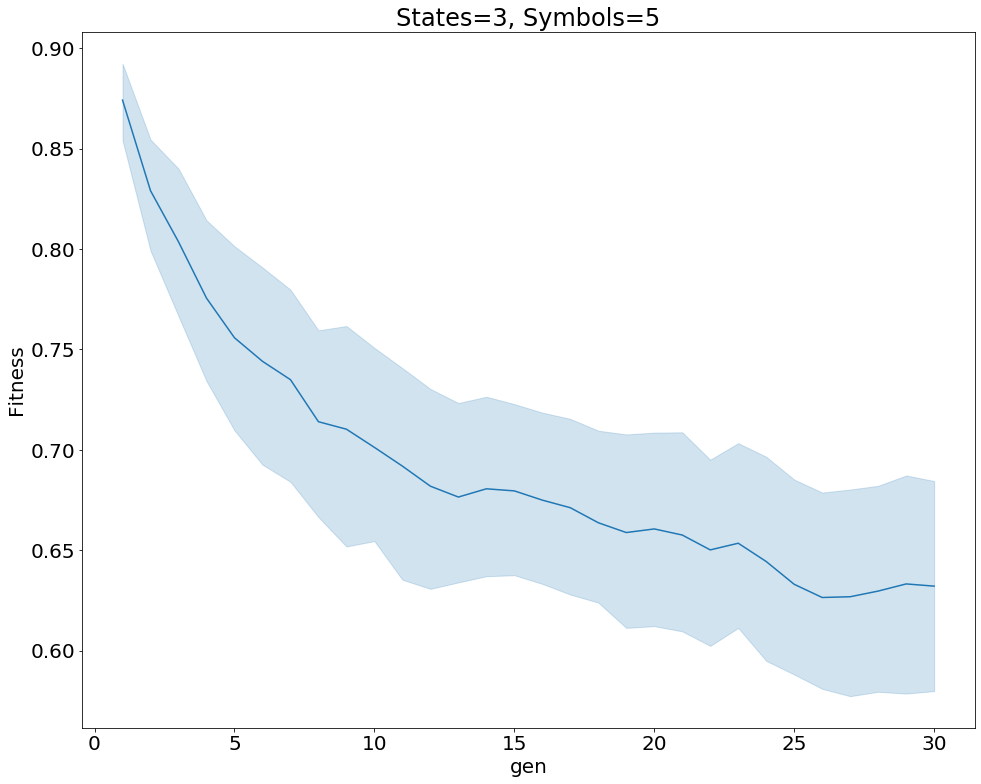

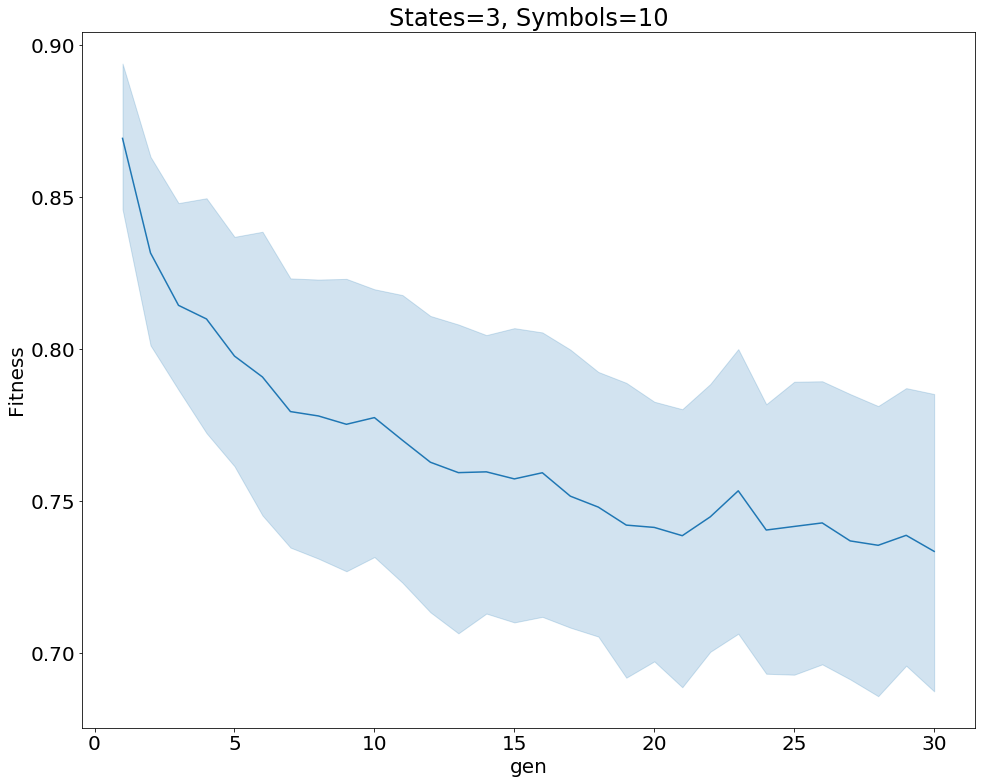

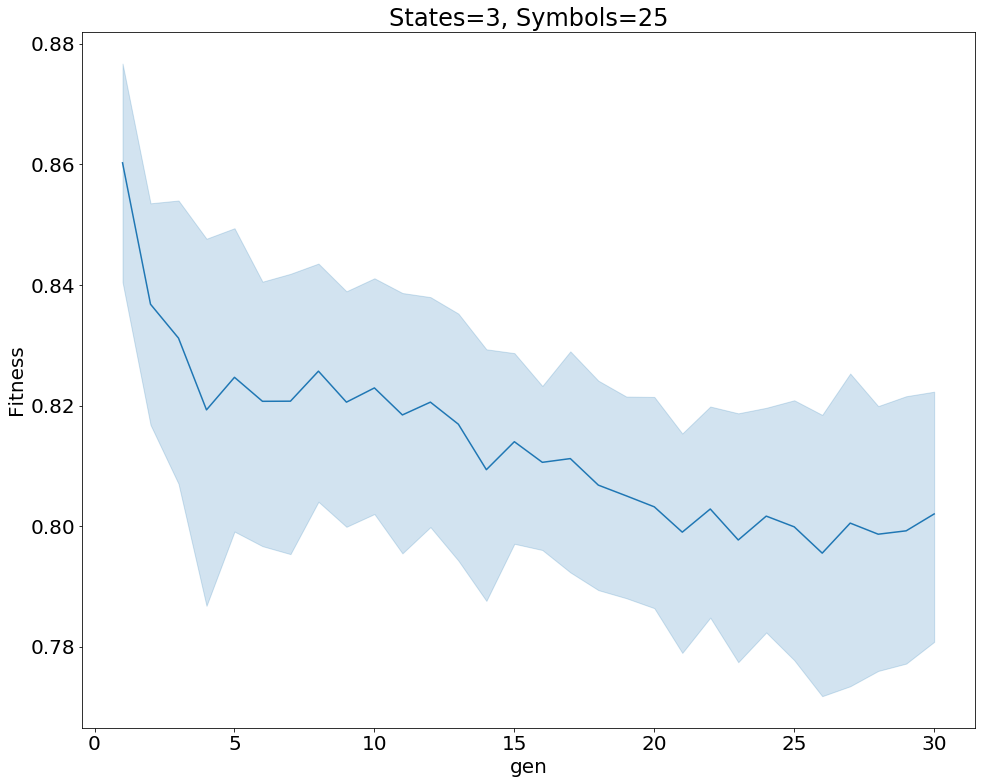

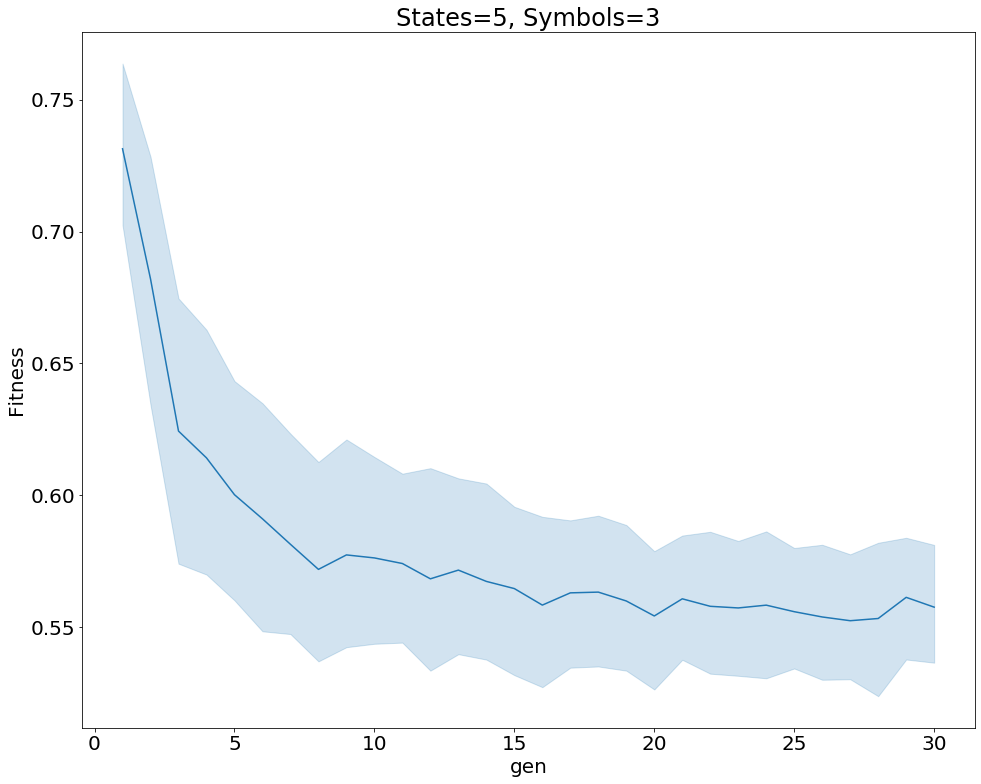

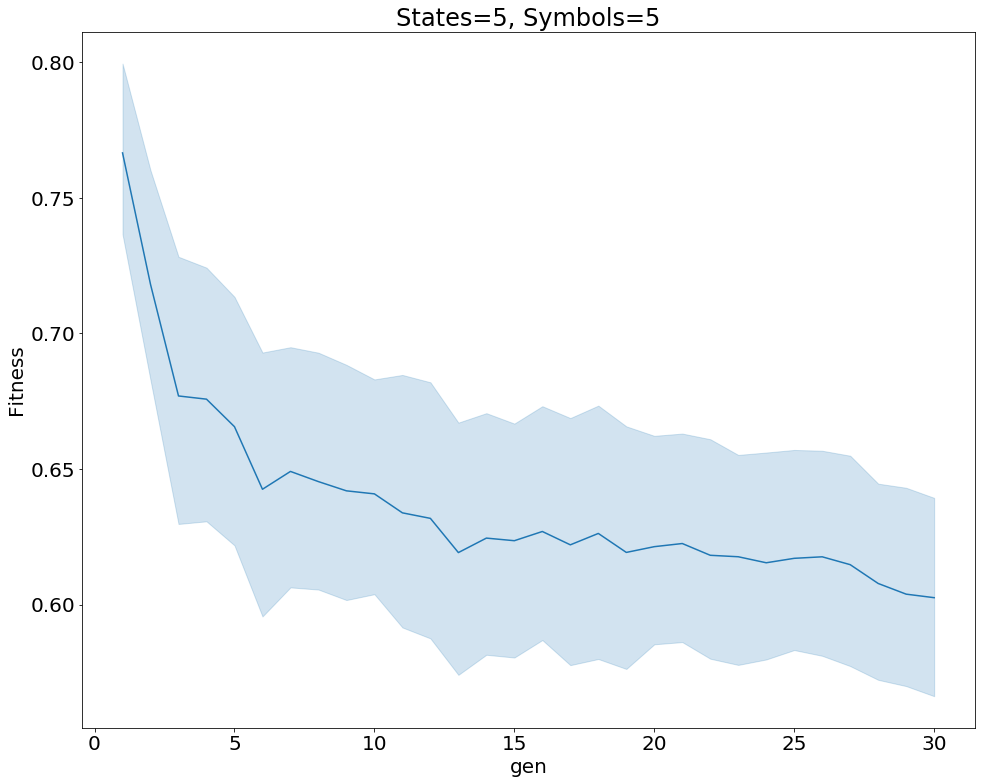

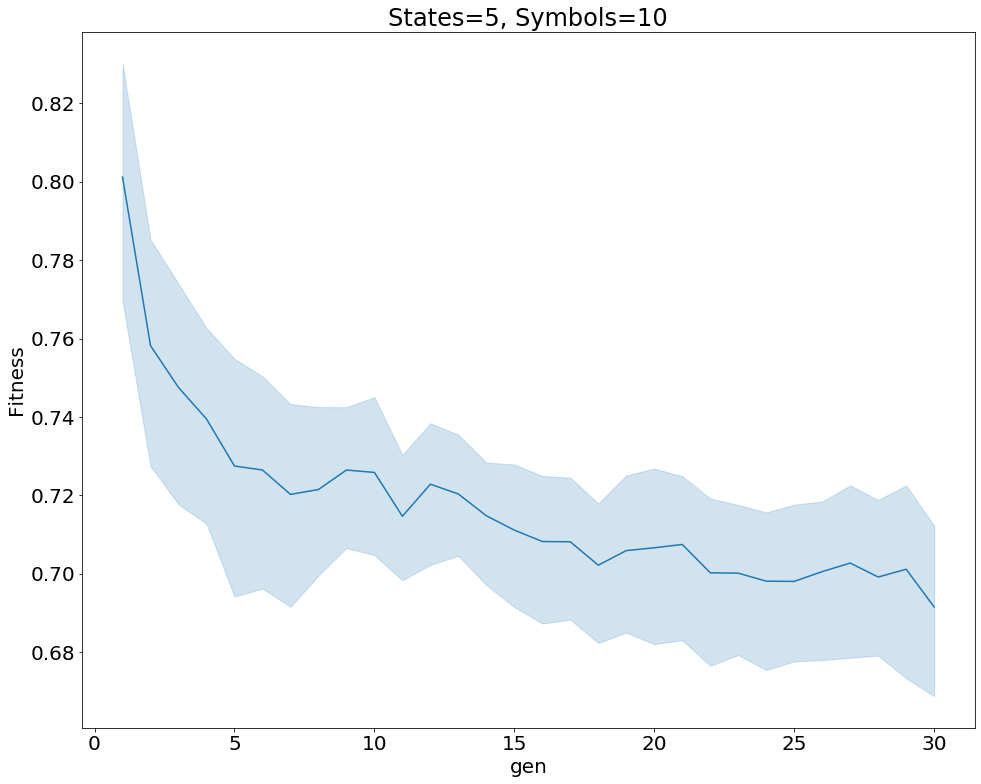

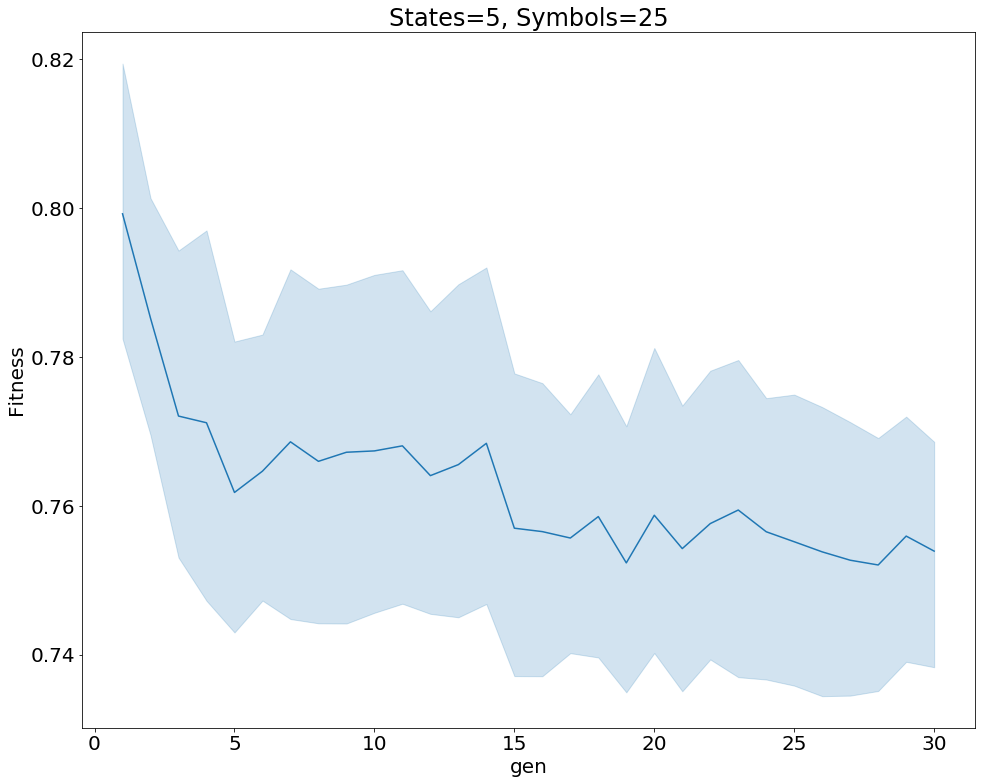

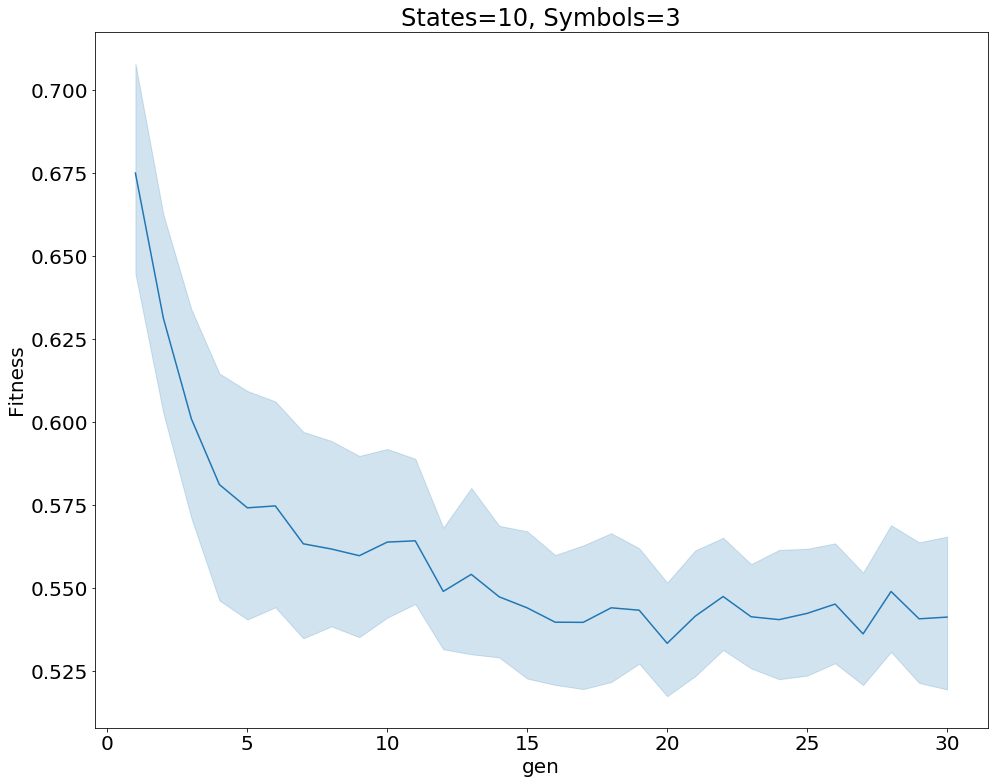

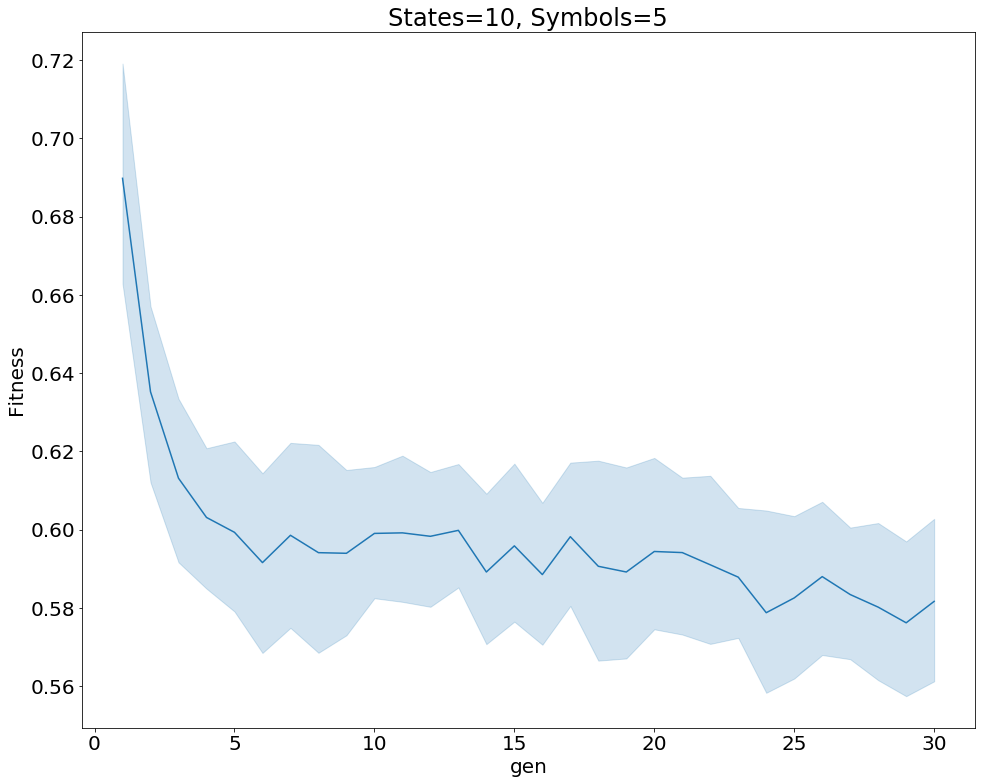

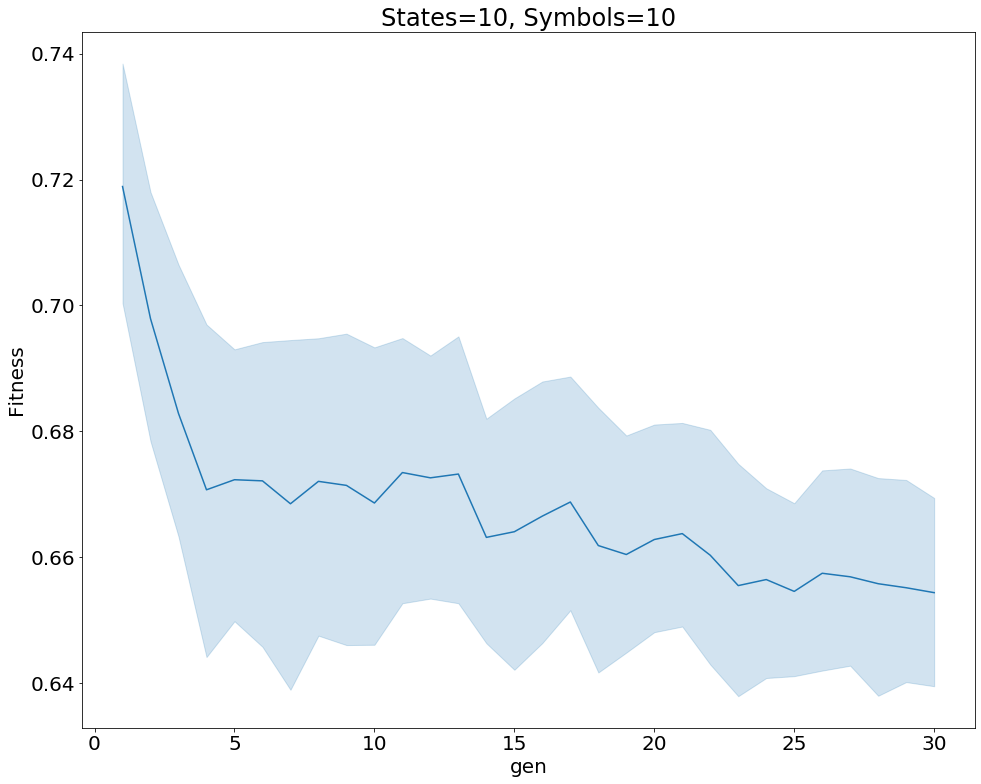

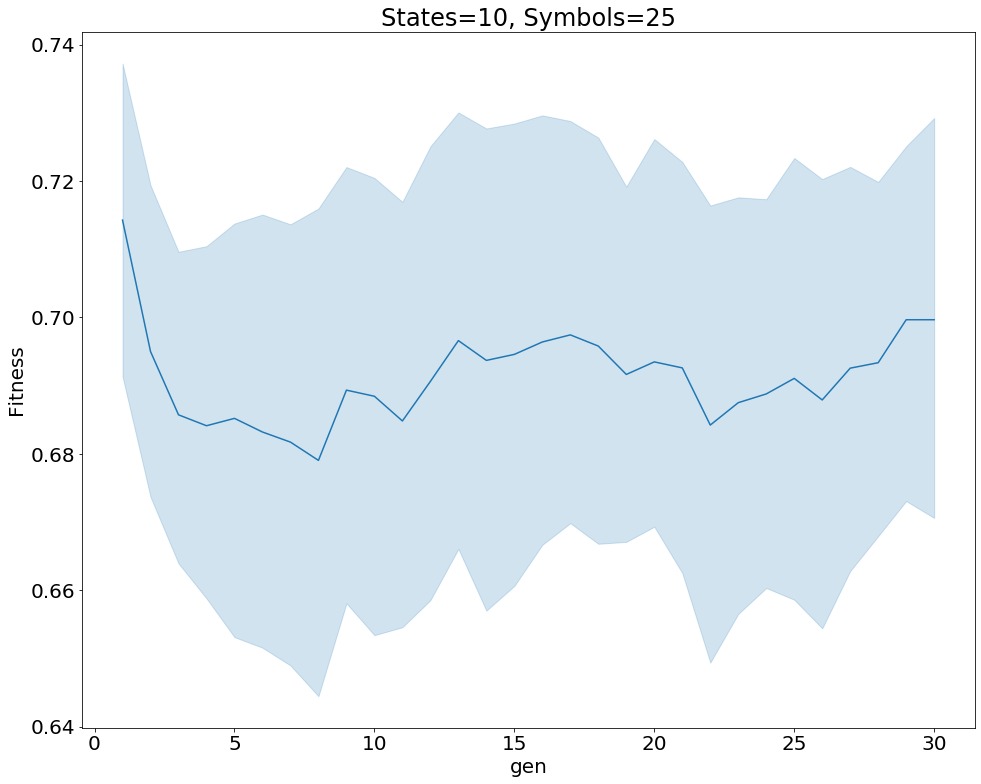

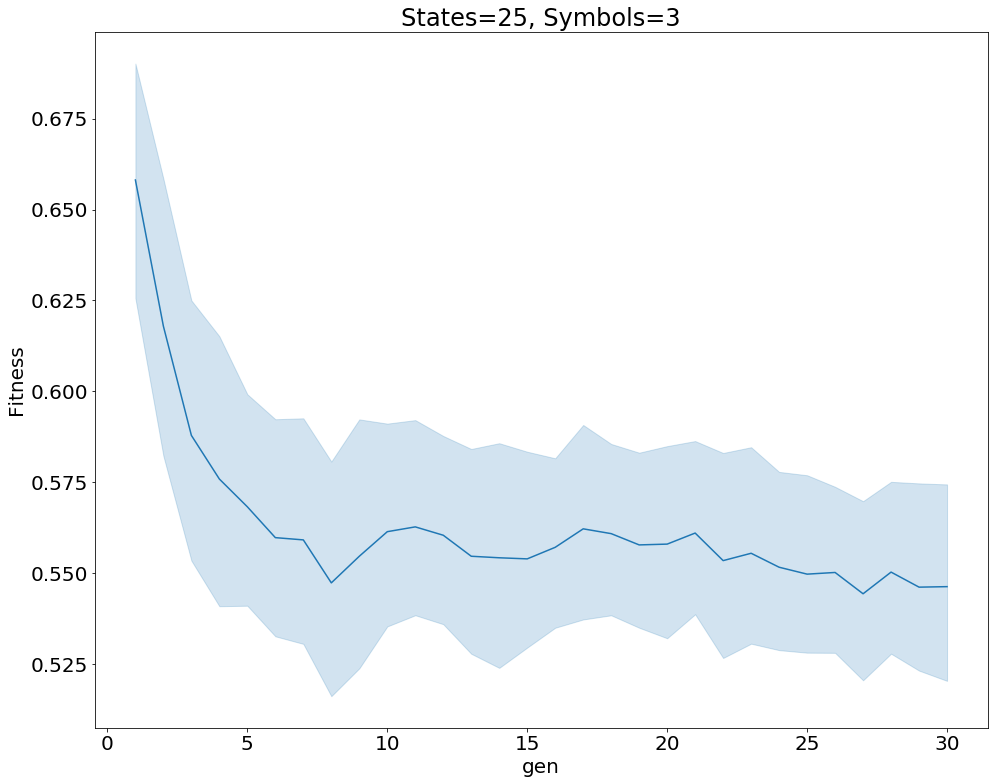

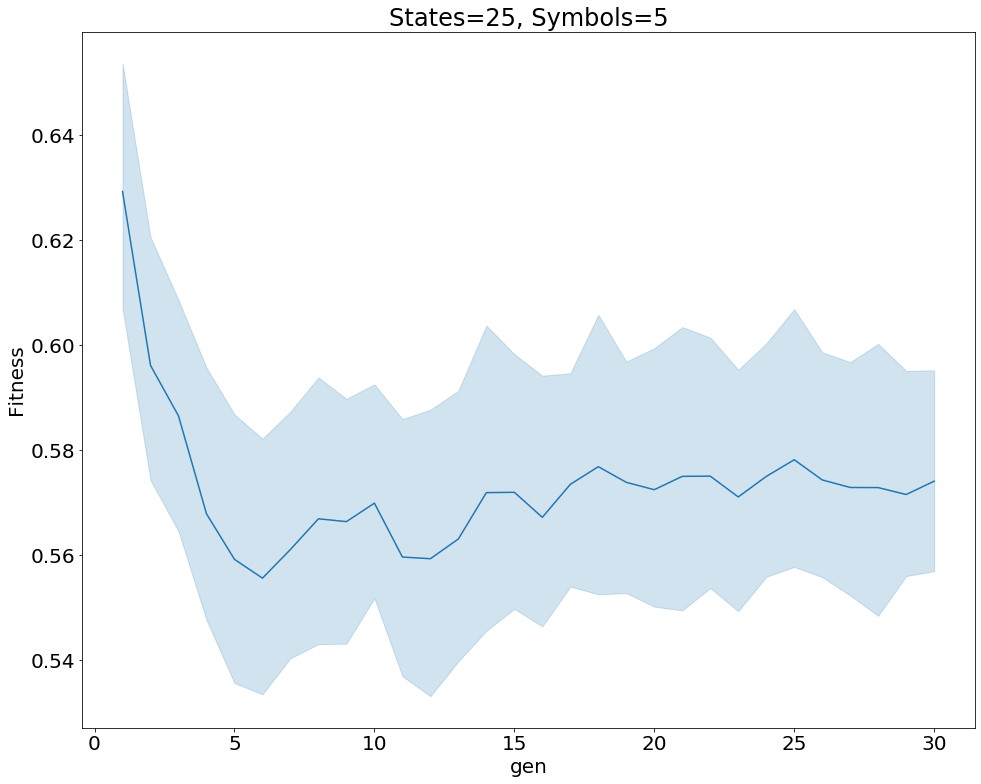

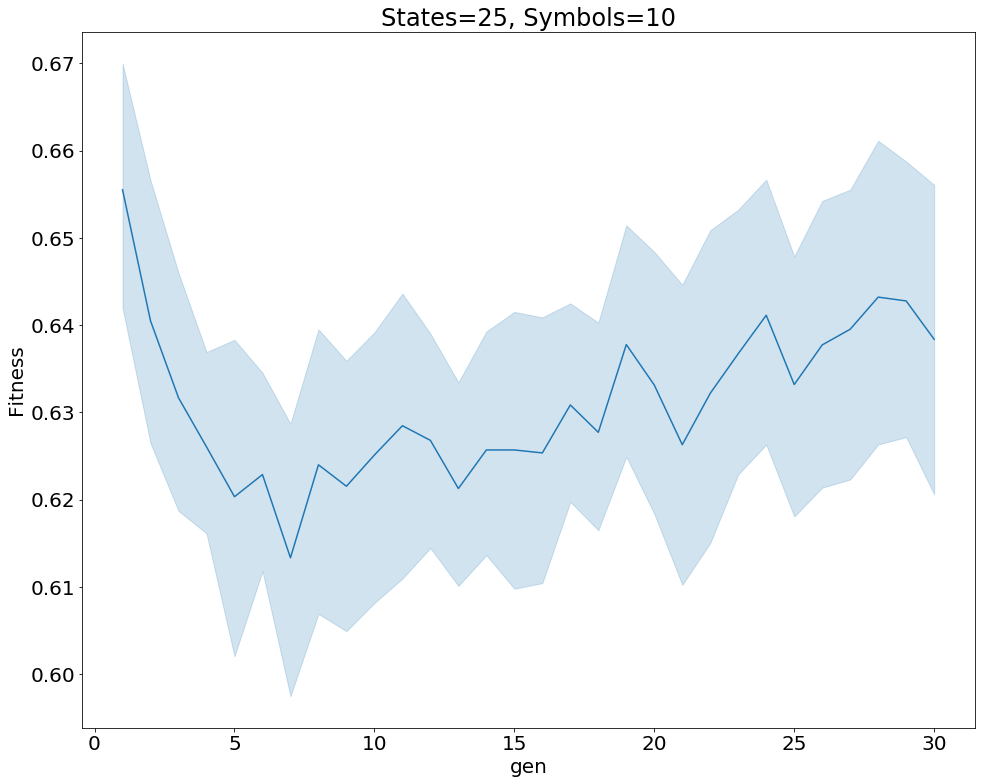

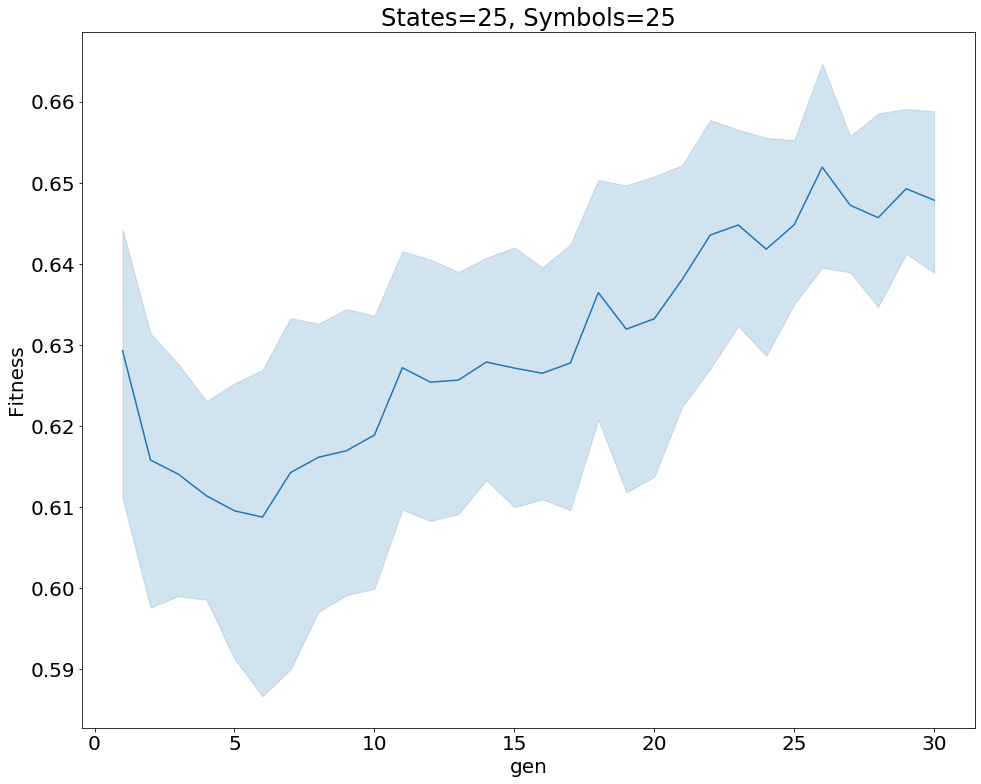

In [16]:
for k, v in data.items():
    title = f"States={k[0]}, Symbols={k[1]}"
    
    plt.figure(figsize=(16, 12.8))
    ax = sns.lineplot(x="gen", y="fitness", data=v)
    ax.set(title=title, ylabel="Fitness")

## Mutation Rate (10 runs)

In [17]:
exp_data = []

for fp in glob.glob("./experiments/mut_rate/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

In [18]:
# Sort the experiment data by mutation rate
exp_data_none = [e for e in exp_data if e["params"]["mut_rate"] is None]
exp_data_not_none = [e for e in exp_data if e["params"]["mut_rate"] is not None]

exp_data = exp_data_none + sorted(exp_data_not_none, key=lambda k: k["params"]["mut_rate"])

In [19]:
# Convert experiment data to format to be displayed as boxplots
data = []
for exp in exp_data:
    mut_rate = exp["params"]["mut_rate"]
    label = "1/N" if mut_rate is None else mut_rate
    
    for i in range(10):
        data.append({
            "mut_rate": label,
            "model": "best_l2",
            "loss": exp["best_l2s"][i] / exp["params"]["states"],
        })
        data.append({
            "mut_rate": label,
            "model": "rand_l2",
            "loss": exp["rand_l2s"][i] / exp["params"]["states"],
        })

df = pd.DataFrame(data)

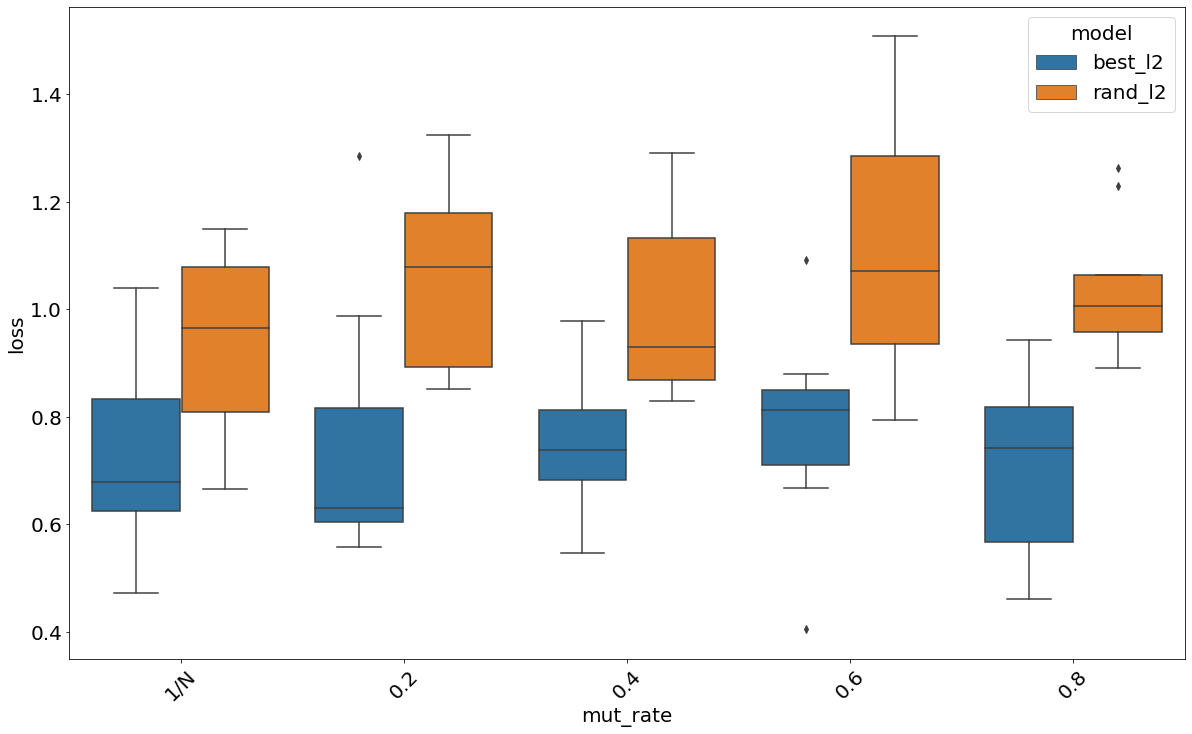

In [20]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="mut_rate",
    y="loss",
    hue="model",
    data=df
)

## Mutation Rate 2 (25 runs)

In [21]:
exp_data = []

for fp in glob.glob("./experiments/mut_rate_2/*.json"):
    with open(fp) as f:
        exp_data.append(json.load(f))

In [22]:
# Sort the experiment data by mutation rate
exp_data_none = [e for e in exp_data if e["params"]["mut_rate"] is None]
exp_data_not_none = [e for e in exp_data if e["params"]["mut_rate"] is not None]

exp_data = exp_data_none + sorted(exp_data_not_none, key=lambda k: k["params"]["mut_rate"])

In [23]:
# Convert experiment data to format to be displayed as boxplots
data = []
for exp in exp_data:
    mut_rate = exp["params"]["mut_rate"]
    label = "1/N" if mut_rate is None else mut_rate
    
    for i in range(10):
        data.append({
            "mut_rate": label,
            "model": "best_l2",
            "loss": exp["best_l2s"][i] / exp["params"]["states"],
        })
        data.append({
            "mut_rate": label,
            "model": "rand_l2",
            "loss": exp["rand_l2s"][i] / exp["params"]["states"],
        })

df = pd.DataFrame(data)

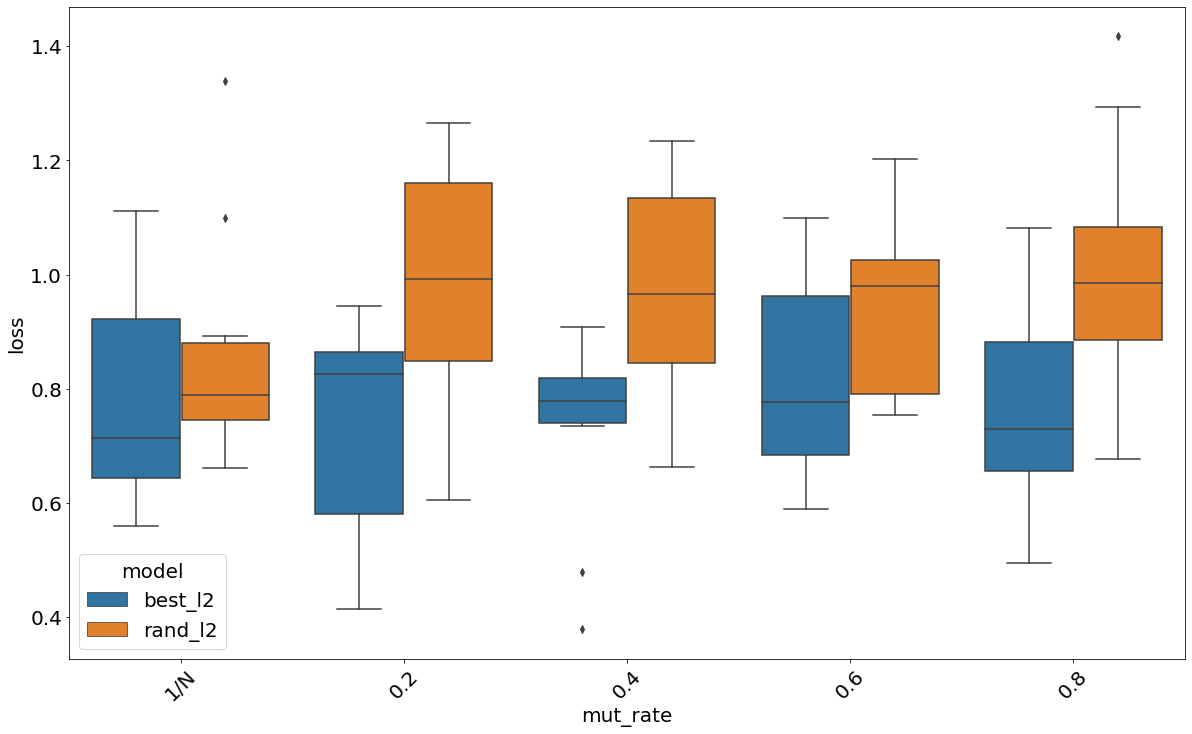

In [24]:
plt.figure(figsize=(20, 12))
plt.xticks(rotation=45)

ax = sns.boxplot(
    x="mut_rate",
    y="loss",
    hue="model",
    data=df
)